# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

from plotly import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter

## 1.1 Reading Data

In [2]:
#since im using google_colab, i have to mount the gdrive folder for accessing the files

from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
#reading the datasets, i have taken only 5000 datapoints into consideration for avoiding mermory issues

project_data = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Assignments_DonorsChoose_2018/train_data.csv' , nrows=50000)
resource_data = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Assignments_DonorsChoose_2018/resources.csv')

In [4]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (50000, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [5]:
# how to replace elements in list python: https://stackoverflow.com/a/2582163/4084039
cols = ['Date' if x=='project_submitted_datetime' else x for x in list(project_data.columns)]


#sort dataframe based on time pandas python: https://stackoverflow.com/a/49702492/4084039
project_data['Date'] = pd.to_datetime(project_data['project_submitted_datetime'])
project_data.drop('project_submitted_datetime', axis=1, inplace=True)
project_data.sort_values(by=['Date'], inplace=True)


# how to reorder columns pandas python: https://stackoverflow.com/a/13148611/4084039
project_data = project_data[cols]


project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
473        100660  p234804  cbc0e38f522143b86d372f8b43d4cff3           Mrs.   
41558       33679  p137682  06f6e62e17de34fcf81020c77549e1d5           Mrs.   

      school_state                Date project_grade_category  \
473             GA 2016-04-27 00:53:00          Grades PreK-2   
41558           WA 2016-04-27 01:05:25             Grades 3-5   

      project_subject_categories project_subject_subcategories  \
473             Applied Learning             Early Development   
41558        Literacy & Language                      Literacy   

                                project_title  \
473    Flexible Seating for Flexible Learning   
41558  Going Deep: The Art of Inner Thinking!   

                                         project_essay_1  \
473    I recently read an article about giving studen...   
41558  My students crave challenge, they eat obstacle...   

                                         project_essay_2  \
473    I teach at a low-income (Title 1) school. Ever...   
41558  We are an urban, public k-5 elementary school....   

                                         project_essay_3  \
473    We need a classroom rug that we can use as a c...   
41558  With the new common core standards that have b...   

                                         project_essay_4  \
473    Benjamin Franklin once said, \"Tell me and I f...   
41558  These remarkable gifts will provide students w...   

                                project_resource_summary  \
473    My students need flexible seating in the class...   
41558  My students need copies of the New York Times ...   

       teacher_number_of_previously_posted_projects  project_is_approved  
473                                               2                    1  
41558                                             2                    1

In [6]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in train data (1541272, 4)
['id' 'description' 'quantity' 'price']


id                                        description  quantity  \
0  p233245  LC652 - Lakeshore Double-Space Mobile Drying Rack         1   
1  p069063        Bouncy Bands for Desks (Blue support pipes)         3   

    price  
0  149.00  
1   14.95

## 1.2 preprocessing of `project_subject_categories`

In [0]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))


## 1.3 preprocessing of `project_subject_subcategories`

In [0]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

## 1.3 Text preprocessing

In [0]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [10]:
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
473        100660  p234804  cbc0e38f522143b86d372f8b43d4cff3           Mrs.   
41558       33679  p137682  06f6e62e17de34fcf81020c77549e1d5           Mrs.   

      school_state                Date project_grade_category  \
473             GA 2016-04-27 00:53:00          Grades PreK-2   
41558           WA 2016-04-27 01:05:25             Grades 3-5   

                                project_title  \
473    Flexible Seating for Flexible Learning   
41558  Going Deep: The Art of Inner Thinking!   

                                         project_essay_1  \
473    I recently read an article about giving studen...   
41558  My students crave challenge, they eat obstacle...   

                                         project_essay_2  \
473    I teach at a low-income (Title 1) school. Ever...   
41558  We are an urban, public k-5 elementary school....   

                                         project_essay_3  \
473    We need a classroom rug that we can use as a c...   
41558  With the new common core standards that have b...   

                                         project_essay_4  \
473    Benjamin Franklin once said, \"Tell me and I f...   
41558  These remarkable gifts will provide students w...   

                                project_resource_summary  \
473    My students need flexible seating in the class...   
41558  My students need copies of the New York Times ...   

       teacher_number_of_previously_posted_projects  project_is_approved  \
473                                               2                    1   
41558                                             2                    1   

        clean_categories clean_subcategories  \
473      AppliedLearning    EarlyDevelopment   
41558  Literacy_Language            Literacy   

                                                   essay  
473    I recently read an article about giving studen...  
41558  My students crave challenge, they eat obstacle...

In [0]:
#### 1.4.2.3 Using Pretrained Models: TFIDF weighted W2V

In [12]:
# printing some random reviews
print(project_data['essay'].values[0])
print("="*50)
print(project_data['essay'].values[150])
print("="*50)
print(project_data['essay'].values[1000])
print("="*50)
print(project_data['essay'].values[20000])
print("="*50)
#print(project_data['essay'].values[99999])
#print("="*50)

I recently read an article about giving students a choice about how they learn. We already set goals; why not let them choose where to sit, and give them options of what to sit on?I teach at a low-income (Title 1) school. Every year, I have a class with a range of abilities, yet they are all the same age. They learn differently, and they have different interests. Some have ADHD, and some are fast learners. Yet they are eager and active learners that want and need to be able to move around the room, yet have a place that they can be comfortable to complete their work.We need a classroom rug that we can use as a class for reading time, and students can use during other learning times. I have also requested four Kore Kids wobble chairs and four Back Jack padded portable chairs so that students can still move during whole group lessons without disrupting the class. Having these areas will provide these little ones with a way to wiggle while working.Benjamin Franklin once said, \"Tell me an

In [0]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [14]:
sent = decontracted(project_data['essay'].values[20000])
print(sent)
print("="*50)

I teach at a Title 1 school, with 73% of my students who receive free/reduced lunch. Our school provides free breakfast for all students. I am a Special Education certified teacher and I teach Kindergarten in a general education setting with my class that consists 52% students with special needs. The disabilities include Autism Spectrum Disorder, Speech Impaired, Language Impaired, Other Health Impaired (ADHD), and Developmentally Delayed. I also have about 42% of my students who are English Language Learners.\r\n\r\n\"Self-motivated learners\" is a synonym of \"my students\".  They love to learn and they possess a positive outlook and attitude in school. Almost everyday, my students would ask me, \"Ms. Perez, what are we going to learn today?\" I could not ask for a better greeting from my students.This project will greatly impact my students’ learning on a daily basis. The wobble chairs will provide assistance for my students who have difficulties focusing and attending during lesson

In [15]:
# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
print(sent)

I teach at a Title 1 school, with 73% of my students who receive free/reduced lunch. Our school provides free breakfast for all students. I am a Special Education certified teacher and I teach Kindergarten in a general education setting with my class that consists 52% students with special needs. The disabilities include Autism Spectrum Disorder, Speech Impaired, Language Impaired, Other Health Impaired (ADHD), and Developmentally Delayed. I also have about 42% of my students who are English Language Learners.     Self-motivated learners  is a synonym of  my students .  They love to learn and they possess a positive outlook and attitude in school. Almost everyday, my students would ask me,  Ms. Perez, what are we going to learn today?  I could not ask for a better greeting from my students.This project will greatly impact my students’ learning on a daily basis. The wobble chairs will provide assistance for my students who have difficulties focusing and attending during lessons and disc

In [16]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
print(sent)

I teach at a Title 1 school with 73 of my students who receive free reduced lunch Our school provides free breakfast for all students I am a Special Education certified teacher and I teach Kindergarten in a general education setting with my class that consists 52 students with special needs The disabilities include Autism Spectrum Disorder Speech Impaired Language Impaired Other Health Impaired ADHD and Developmentally Delayed I also have about 42 of my students who are English Language Learners Self motivated learners is a synonym of my students They love to learn and they possess a positive outlook and attitude in school Almost everyday my students would ask me Ms Perez what are we going to learn today I could not ask for a better greeting from my students This project will greatly impact my students learning on a daily basis The wobble chairs will provide assistance for my students who have difficulties focusing and attending during lessons and discussions Despite the fact that stud

In [0]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [18]:
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_essays = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    preprocessed_essays.append(sent.lower().strip())

100%|██████████| 50000/50000 [00:32<00:00, 1533.78it/s]


In [19]:
# after preprocesing
preprocessed_essays[20000]

'teach title 1 school 73 students receive free reduced lunch school provides free breakfast students special education certified teacher teach kindergarten general education setting class consists 52 students special needs disabilities include autism spectrum disorder speech impaired language impaired health impaired adhd developmentally delayed also 42 students english language learners self motivated learners synonym students love learn possess positive outlook attitude school almost everyday students would ask ms perez going learn today could not ask better greeting students project greatly impact students learning daily basis wobble chairs provide assistance students difficulties focusing attending lessons discussions despite fact students participate physical activities p e recess gonoodle dance videos sessions classroom students still energy stand wiggle seats lessons due special needs beyond students control lot distraction student learning not really achieved full potential lac

<h2><font color='red'> 1.4 Preprocessing of `project_title`</font></h2>

In [20]:
# similarly you can preprocess the titles also

from tqdm import tqdm
preprocessed_project_title = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['project_title'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_project_title.append(sent.lower().strip())

100%|██████████| 50000/50000 [00:01<00:00, 32202.32it/s]


## 1.5 Preparing data for models

In [21]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'Date', 'project_grade_category', 'project_title', 'project_essay_1',
       'project_essay_2', 'project_essay_3', 'project_essay_4',
       'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'essay'],
      dtype='object')

we are going to consider

       - school_state : categorical data
       - clean_categories : categorical data
       - clean_subcategories : categorical data
       - project_grade_category : categorical data
       - teacher_prefix : categorical data
       
       - project_title : text data
       - text : text data
       - project_resource_summary: text data (optinal)
       
       - quantity : numerical (optinal)
       - teacher_number_of_previously_posted_projects : numerical
       - price : numerical

### Modifying DataSet (essay & project_title)

In [0]:
project_data['clean_essay'] = preprocessed_essays
project_data['clean_project_title'] = preprocessed_project_title
project_data.drop(['essay'], axis=1, inplace=True)
project_data.drop(['project_title'], axis=1, inplace=True)

In [23]:
project_data.head(1)

Unnamed: 0       id                        teacher_id teacher_prefix  \
473      100660  p234804  cbc0e38f522143b86d372f8b43d4cff3           Mrs.   

    school_state                Date project_grade_category  \
473           GA 2016-04-27 00:53:00          Grades PreK-2   

                                       project_essay_1  \
473  I recently read an article about giving studen...   

                                       project_essay_2  \
473  I teach at a low-income (Title 1) school. Ever...   

                                       project_essay_3  \
473  We need a classroom rug that we can use as a c...   

                                       project_essay_4  \
473  Benjamin Franklin once said, \"Tell me and I f...   

                              project_resource_summary  \
473  My students need flexible seating in the class...   

     teacher_number_of_previously_posted_projects  project_is_approved  \
473                                             2                    1   

    clean_categories clean_subcategories  \
473  AppliedLearning    EarlyDevelopment   

                                           clean_essay  \
473  recently read article giving students choice l...   

                    clean_project_title  
473  flexible seating flexible learning

In [24]:
y = project_data['project_is_approved'].values
project_data.drop(['project_is_approved'], axis=1, inplace=True)
project_data.head(1)

Unnamed: 0       id                        teacher_id teacher_prefix  \
473      100660  p234804  cbc0e38f522143b86d372f8b43d4cff3           Mrs.   

    school_state                Date project_grade_category  \
473           GA 2016-04-27 00:53:00          Grades PreK-2   

                                       project_essay_1  \
473  I recently read an article about giving studen...   

                                       project_essay_2  \
473  I teach at a low-income (Title 1) school. Ever...   

                                       project_essay_3  \
473  We need a classroom rug that we can use as a c...   

                                       project_essay_4  \
473  Benjamin Franklin once said, \"Tell me and I f...   

                              project_resource_summary  \
473  My students need flexible seating in the class...   

     teacher_number_of_previously_posted_projects clean_categories  \
473                                             2  AppliedLearning   

    clean_subcategories                                        clean_essay  \
473    EarlyDevelopment  recently read article giving students choice l...   

                    clean_project_title  
473  flexible seating flexible learning

In [0]:
X = project_data

<h2>2.1 Splitting data into Train and cross validation(or test): Stratified Sampling</h2>

In [0]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label
    
    
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y)
#X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.33, stratify=y_train)    

In [27]:
X_train.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
27681      121134  p232727  db2f6b3da5f2276497a47e1c07dee18b            Ms.   
11658       75626  p114174  e04631b927506520db04cddf1d983e1c            Ms.   

      school_state                Date project_grade_category  \
27681           NC 2016-11-01 16:38:54          Grades PreK-2   
11658           NC 2017-02-09 13:44:59             Grades 6-8   

                                         project_essay_1  \
27681  My students are energetic learners who love an...   
11658  As the music/choir teacher, I have the privile...   

                                         project_essay_2 project_essay_3  \
27681  Many of the materials and books I use within s...             NaN   
11658  This year, our school is producing its first s...             NaN   

      project_essay_4                           project_resource_summary  \
27681             NaN  My students need adapted materials in order to...   
11658             NaN  My students need microphones to let their tale...   

       teacher_number_of_previously_posted_projects clean_categories  \
27681                                             2     SpecialNeeds   
11658                                             2       Music_Arts   

      clean_subcategories                                        clean_essay  \
27681        SpecialNeeds  students energetic learners love thrive hands ...   
11658      PerformingArts  music choir teacher privilege teaching majorit...   

                                     clean_project_title  
27681  supplies make materials growing speech languag...  
11658                          let their voices be heard

In [28]:
resource_data.head(1)

id                                        description  quantity  price
0  p233245  LC652 - Lakeshore Double-Space Mobile Drying Rack         1  149.0

<h2>2.2 Make Data Model Ready: encoding numerical, categorical features</h2>

### clean_categories

In [29]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train['clean_categories'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_cc_ohe = vectorizer.transform(X_train['clean_categories'].values)
#X_cv_cc_ohe = vectorizer.transform(X_cv['clean_categories'].values)
X_test_cc_ohe = vectorizer.transform(X_test['clean_categories'].values)

feat_cc = vectorizer.get_feature_names()


print("After vectorizations")
print(X_train_cc_ohe.shape, y_train.shape)
#print(X_cv_cc_ohe.shape, y_cv.shape)
print(X_test_cc_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(33500, 9) (33500,)
(16500, 9) (16500,)
['appliedlearning', 'care_hunger', 'health_sports', 'history_civics', 'literacy_language', 'math_science', 'music_arts', 'specialneeds', 'warmth']


### clean_subcategories

In [30]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train['clean_subcategories'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_csc_ohe = vectorizer.transform(X_train['clean_subcategories'].values)
#X_cv_csc_ohe = vectorizer.transform(X_cv['clean_subcategories'].values)
X_test_csc_ohe = vectorizer.transform(X_test['clean_subcategories'].values)

feat_csc = vectorizer.get_feature_names()


print("After vectorizations")
print(X_train_csc_ohe.shape, y_train.shape)
#print(X_cv_csc_ohe.shape, y_cv.shape)
print(X_test_csc_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(33500, 30) (33500,)
(16500, 30) (16500,)
['appliedsciences', 'care_hunger', 'charactereducation', 'civics_government', 'college_careerprep', 'communityservice', 'earlydevelopment', 'economics', 'environmentalscience', 'esl', 'extracurricular', 'financialliteracy', 'foreignlanguages', 'gym_fitness', 'health_lifescience', 'health_wellness', 'history_geography', 'literacy', 'literature_writing', 'mathematics', 'music', 'nutritioneducation', 'other', 'parentinvolvement', 'performingarts', 'socialsciences', 'specialneeds', 'teamsports', 'visualarts', 'warmth']


### school_state

In [31]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train['school_state'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_state_ohe = vectorizer.transform(X_train['school_state'].values)
#X_cv_state_ohe = vectorizer.transform(X_cv['school_state'].values)
X_test_state_ohe = vectorizer.transform(X_test['school_state'].values)

feat_ss = vectorizer.get_feature_names()


print("After vectorizations")
print(X_train_state_ohe.shape, y_train.shape)
#print(X_cv_state_ohe.shape, y_cv.shape)
print(X_test_state_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(33500, 51) (33500,)
(16500, 51) (16500,)
['ak', 'al', 'ar', 'az', 'ca', 'co', 'ct', 'dc', 'de', 'fl', 'ga', 'hi', 'ia', 'id', 'il', 'in', 'ks', 'ky', 'la', 'ma', 'md', 'me', 'mi', 'mn', 'mo', 'ms', 'mt', 'nc', 'nd', 'ne', 'nh', 'nj', 'nm', 'nv', 'ny', 'oh', 'ok', 'or', 'pa', 'ri', 'sc', 'sd', 'tn', 'tx', 'ut', 'va', 'vt', 'wa', 'wi', 'wv', 'wy']


### teacher_prefix



In [32]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train['teacher_prefix'].values.astype('U')) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_teacher_ohe = vectorizer.transform(X_train['teacher_prefix'].values.astype('U'))
#X_cv_teacher_ohe = vectorizer.transform(X_cv['teacher_prefix'].values.astype('U'))
X_test_teacher_ohe = vectorizer.transform(X_test['teacher_prefix'].values.astype('U'))

feat_tp = vectorizer.get_feature_names()


print("After vectorizations")
print(X_train_teacher_ohe.shape, y_train.shape)
#print(X_cv_teacher_ohe.shape, y_cv.shape)
print(X_test_teacher_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(33500, 5) (33500,)
(16500, 5) (16500,)
['mr', 'mrs', 'ms', 'nan', 'teacher']


### project_grade_category

In [33]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train['project_grade_category'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_grade_ohe = vectorizer.transform(X_train['project_grade_category'].values)
#X_cv_grade_ohe = vectorizer.transform(X_cv['project_grade_category'].values)
X_test_grade_ohe = vectorizer.transform(X_test['project_grade_category'].values)

feat_pgc = vectorizer.get_feature_names()


print("After vectorizations")
print(X_train_grade_ohe.shape, y_train.shape)
#print(X_cv_grade_ohe.shape, y_cv.shape)
print(X_test_grade_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(33500, 3) (33500,)
(16500, 3) (16500,)
['12', 'grades', 'prek']


<h2>2.3 Make Data Model Ready: encoding eassay, and project_title</h2>



#### 1.5.2.1 Bag of words

### essays

In [34]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(min_df=10,ngram_range=(2,2), max_features=5000)
vectorizer.fit(X_train['clean_essay'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_essay_bow = vectorizer.transform(X_train['clean_essay'].values)
#X_cv_essay_bow = vectorizer.transform(X_cv['clean_essay'].values)
X_test_essay_bow = vectorizer.transform(X_test['clean_essay'].values)

feat_bow_e = vectorizer.get_feature_names()


print("After vectorizations")
print(X_train_essay_bow.shape, y_train.shape)
#print(X_cv_essay_bow.shape, y_cv.shape)
print(X_test_essay_bow.shape, y_test.shape)
print("="*100)

After vectorizations
(33500, 5000) (33500,)
(16500, 5000) (16500,)


### project_title

In [35]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(min_df=10)
vectorizer.fit(X_train['clean_project_title'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_pt_bow = vectorizer.transform(X_train['clean_project_title'].values)
#X_cv_pt_bow = vectorizer.transform(X_cv['clean_project_title'].values)
X_test_pt_bow = vectorizer.transform(X_test['clean_project_title'].values)

feat_bow_pt = vectorizer.get_feature_names()


print("After vectorizations")
print(X_train_pt_bow.shape, y_train.shape)
#print(X_cv_pt_bow.shape, y_cv.shape)
print(X_test_pt_bow.shape, y_test.shape)
print("="*100)

After vectorizations
(33500, 1625) (33500,)
(16500, 1625) (16500,)


#### 1.5.2.2 TFIDF vectorizer

### essays

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=10, ngram_range=(2,2), max_features=5000)
X_train_essay_tfidf = vectorizer.fit_transform(X_train['clean_essay'].values)
#X_cv_essay_tfidf = vectorizer.transform(X_cv['clean_essay'].values)
X_test_essay_tfidf = vectorizer.transform(X_test['clean_essay'].values)

feat_tfidf_e = vectorizer.get_feature_names()



print("Shape of matrix after one hot encodig ",X_train_essay_tfidf.shape)
#print("Shape of matrix after one hot encodig ",X_cv_essay_tfidf.shape)
print("Shape of matrix after one hot encodig ",X_test_essay_tfidf.shape)

Shape of matrix after one hot encodig  (33500, 5000)
Shape of matrix after one hot encodig  (16500, 5000)


### project_title

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=10)
X_train_pt_tfidf = vectorizer.fit_transform(X_train['clean_project_title'].values)
#X_cv_pt_tfidf = vectorizer.transform(X_cv['clean_project_title'].values)
X_test_pt_tfidf = vectorizer.transform(X_test['clean_project_title'].values)

feat_tfidf_pt = vectorizer.get_feature_names()



print("Shape of matrix after one hot encodig ",X_train_pt_tfidf.shape)
#print("Shape of matrix after one hot encodig ",X_cv_pt_tfidf.shape)
print("Shape of matrix after one hot encodig ",X_test_pt_tfidf.shape)

Shape of matrix after one hot encodig  (33500, 1625)
Shape of matrix after one hot encodig  (16500, 1625)


#### 1.5.2.3 Using Pretrained Models: Avg W2V

### essays

#### Train

In [0]:
i=0
list_of_sentanceTrain=[]
for sentance in X_train['clean_essay']:
    list_of_sentanceTrain.append(sentance.split())

In [39]:
is_your_ram_gt_16g=False
want_to_use_google_w2v = False
want_to_train_w2v = True

if want_to_train_w2v:
    # min_count = 5 considers only words that occured atleast 5 times
    w2v_model=Word2Vec(list_of_sentanceTrain,min_count=5,size=50, workers=4)
    print(w2v_model.wv.most_similar('great'))
    print('='*50)
    #print(w2v_model.wv.most_similar('worst'))
    
elif want_to_use_google_w2v and is_your_ram_gt_16g:
    if os.path.isfile('GoogleNews-vectors-negative300.bin'):
        w2v_model=KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True)
        #print(w2v_model.wv.most_similar('great'))
        #print(w2v_model.wv.most_similar('worst'))
    else:
        print("you don't have gogole's word2vec file, keep want_to_train_w2v = True, to train your own w2v ")


[('awesome', 0.7163534164428711), ('amazing', 0.701507031917572), ('wonderful', 0.7003672122955322), ('excellent', 0.6790145635604858), ('incredible', 0.6261308193206787), ('fantastic', 0.6167498230934143), ('good', 0.6117324233055115), ('perfect', 0.5612435340881348), ('powerful', 0.5277734994888306), ('positive', 0.5257251858711243)]


In [40]:
w2v_words = list(w2v_model.wv.vocab)
print("number of words that occured minimum 5 times ",len(w2v_words))
print("sample words ", w2v_words[0:50])

number of words that occured minimum 5 times  14710
sample words  ['students', 'energetic', 'learners', 'love', 'thrive', 'hands', 'learning', 'caseload', 'consists', 'autism', 'intellectual', 'disabilities', 'speech', 'language', 'impairments', 'emotional', 'disorders', 'health', 'work', 'anywhere', 'kindergarten', 'fifth', 'grade', 'served', 'therapy', 'others', 'receive', 'education', 'within', 'exception', 'children', 'program', 'order', 'reach', 'individual', 'needs', 'deserve', 'chance', 'use', 'wide', 'variety', 'materials', 'designed', 'increase', 'vocabulary', 'correct', 'grammar', 'sentence', 'structure', 'clarity']


In [41]:
sent_vectorsPPE_train = []; # the avg-w2v for each sentence/review is stored in this list
for sent in tqdm(list_of_sentanceTrain): # for each review/sentence
    sent_vec = np.zeros(50) # as word vectors are of zero length 50, you might need to change this to 300 if you use google's w2v
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
    if cnt_words != 0:
        sent_vec /= cnt_words
    sent_vectorsPPE_train.append(sent_vec)
print(len(sent_vectorsPPE_train))
print(len(sent_vectorsPPE_train[0]))

100%|██████████| 33500/33500 [03:10<00:00, 176.30it/s]

33500
50


#### Test

In [0]:
i=0
list_of_sentanceTest=[]
for sentance in X_test['clean_essay']:
    list_of_sentanceTest.append(sentance.split())

In [43]:
is_your_ram_gt_16g=False
want_to_use_google_w2v = False
want_to_train_w2v = True

if want_to_train_w2v:
    # min_count = 5 considers only words that occured atleast 5 times
    w2v_model=Word2Vec(list_of_sentanceTest,min_count=5,size=50, workers=4)
    print(w2v_model.wv.most_similar('great'))
    print('='*50)
    print(w2v_model.wv.most_similar('worst'))
    
elif want_to_use_google_w2v and is_your_ram_gt_16g:
    if os.path.isfile('GoogleNews-vectors-negative300.bin'):
        w2v_model=KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True)
        print(w2v_model.wv.most_similar('great'))
        print(w2v_model.wv.most_similar('worst'))
    else:
        print("you don't have gogole's word2vec file, keep want_to_train_w2v = True, to train your own w2v ")


[('amazing', 0.6402102708816528), ('wonderful', 0.6270007491111755), ('excellent', 0.6005108952522278), ('awesome', 0.592974841594696), ('incredible', 0.574778139591217), ('definitely', 0.5078597068786621), ('paving', 0.4812021255493164), ('fantastic', 0.4785519540309906), ('good', 0.4701913297176361), ('perfect', 0.4697127640247345)]
[('unfair', 0.8973550200462341), ('baton', 0.8861933946609497), ('greenville', 0.8802598714828491), ('minneapolis', 0.8736962080001831), ('plagued', 0.8717018365859985), ('minnesota', 0.8565873503684998), ('flint', 0.8559854030609131), ('springs', 0.8534966707229614), ('rouge', 0.851953387260437), ('tulsa', 0.8503621816635132)]


In [44]:
w2v_words = list(w2v_model.wv.vocab)
print("number of words that occured minimum 5 times ",len(w2v_words))
print("sample words ", w2v_words[0:50])

number of words that occured minimum 5 times  11134
sample words  ['students', 'fun', 'energetic', 'group', 'kids', 'variety', 'needs', 'class', 'year', 'includes', 'emotional', 'disorders', 'different', 'learning', 'disabilities', 'attention', 'deficit', 'english', 'language', 'deficiencies', 'despite', 'eagerness', 'learn', 'question', 'succeed', 'live', 'high', 'poverty', 'community', '60', 'school', 'receiving', 'free', 'reduced', 'price', 'lunch', 'situation', 'generous', 'loving', 'last', 'raised', 'money', 'per', 'student', 'elementary', 'indiana', 'give', 'children', 'hospital', 'gold']


In [45]:
sent_vectorsPPE_test = []; # the avg-w2v for each sentence/review is stored in this list
for sent in tqdm(list_of_sentanceTest): # for each review/sentence
    sent_vec = np.zeros(50) # as word vectors are of zero length 50, you might need to change this to 300 if you use google's w2v
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
    if cnt_words != 0:
        sent_vec /= cnt_words
    sent_vectorsPPE_test.append(sent_vec)
print(len(sent_vectorsPPE_test))
print(len(sent_vectorsPPE_test[0]))
        

100%|██████████| 16500/16500 [01:18<00:00, 209.72it/s]

16500
50


### project_title

#### Train

In [0]:
# Similarly you can vectorize for title also

# Train your own Word2Vec model using your own text corpus
i=0
list_of_sentancePTtrain=[]
for sentance in X_train['clean_project_title']:
    list_of_sentancePTtrain.append(sentance.split())

In [47]:
is_your_ram_gt_16g=False
want_to_use_google_w2v = False
want_to_train_w2v = True

try :
  
  
  if want_to_train_w2v:
    # min_count = 5 considers only words that occured atleast 5 times
    w2v_model=Word2Vec(list_of_sentancePTtrain,min_count=5,size=50, workers=4)
    print(w2v_model.wv.most_similar('great'))
    print('='*50)
    print(w2v_model.wv.most_similar('worst'))
    
  elif want_to_use_google_w2v and is_your_ram_gt_16g:
    if os.path.isfile('GoogleNews-vectors-negative300.bin'):
        w2v_model=KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True)
        print(w2v_model.wv.most_similar('great'))
        print(w2v_model.wv.most_similar('worst'))
    else:
        print("you don't have gogole's word2vec file, keep want_to_train_w2v = True, to train your own w2v ")
        
except KeyError :
  
  pass
  
finally :
  
  print("Execution Done")
  
  

[('right', 0.9930854439735413), ('clubs', 0.9900359511375427), ('picture', 0.9877787232398987), ('comic', 0.987118124961853), ('everyone', 0.98623126745224), ('at', 0.9862272143363953), ('day', 0.984882116317749), ('open', 0.9830632209777832), ('difference', 0.9829698204994202), ('shelf', 0.9819193482398987)]
Execution Done


In [48]:
w2v_words = list(w2v_model.wv.vocab)
print("number of words that occured minimum 5 times ",len(w2v_words))
print("sample words ", w2v_words[0:50])

number of words that occured minimum 5 times  2699
sample words  ['supplies', 'make', 'materials', 'growing', 'speech', 'language', 'skills', 'let', 'their', 'voices', 'be', 'heard', 'quiet', 'computer', 'lab', 'i', 'ca', 'not', 'believe', 'read', 'whole', 'book', 'it', 'all', 'about', 'math', 'chromebooks', 'young', 'leaders', 'aspiring', 'artists', 'get', 'creative', 'wobble', 'seats', 'increased', 'focus', 'books', 'more', 'new', 'year', 'jazz', 'made', 'possible', 'differentiation', 'through', 'technology', 'being', 'active', 'healthy']


In [49]:
sent_vectorsPT_train = []; # the avg-w2v for each sentence/review is stored in this list
for sent in tqdm(list_of_sentancePTtrain): # for each review/sentence
    sent_vec = np.zeros(50) # as word vectors are of zero length 50, you might need to change this to 300 if you use google's w2v
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
    if cnt_words != 0:
        sent_vec /= cnt_words
    sent_vectorsPT_train.append(sent_vec)
print(len(sent_vectorsPT_train))
print(len(sent_vectorsPT_train[0]))

100%|██████████| 33500/33500 [00:03<00:00, 9857.28it/s] 

33500
50


#### Test

In [0]:
i=0
list_of_sentancePT_test=[]
for sentance in X_test['clean_project_title']:
    list_of_sentancePT_test.append(sentance.split())

In [51]:
# Using Google News Word2Vectors

# in this project we are using a pretrained model by google
# its 3.3G file, once you load this into your memory 
# it occupies ~9Gb, so please do this step only if you have >12G of ram
# we will provide a pickle file wich contains a dict , 
# and it contains all our courpus words as keys and  model[word] as values
# To use this code-snippet, download "GoogleNews-vectors-negative300.bin" 
# from https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit
# it's 1.9GB in size.


# http://kavita-ganesan.com/gensim-word2vec-tutorial-starter-code/#.W17SRFAzZPY
# you can comment this whole cell
# or change these varible according to your need

is_your_ram_gt_16g=False
want_to_use_google_w2v = False
want_to_train_w2v = True

if want_to_train_w2v:
    # min_count = 5 considers only words that occured atleast 5 times
    w2v_model=Word2Vec(list_of_sentancePT_test,min_count=5,size=50, workers=4)
    print(w2v_model.wv.most_similar('great'))
    print('='*50)
    #print(w2v_model.wv.most_similar('worst'))
    
elif want_to_use_google_w2v and is_your_ram_gt_16g:
    if os.path.isfile('GoogleNews-vectors-negative300.bin'):
        w2v_model=KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True)
        print(w2v_model.wv.most_similar('great'))
        print(w2v_model.wv.most_similar('worst'))
    else:
        print("you don't have gogole's word2vec file, keep want_to_train_w2v = True, to train your own w2v ")


[('station', 0.9996743202209473), ('club', 0.9995881915092468), ('today', 0.9995874762535095), ('program', 0.9995856285095215), ('equipment', 0.9995800256729126), ('power', 0.9995685815811157), ('amazing', 0.999566376209259), ('the', 0.9995642304420471), ('bring', 0.9995576739311218), ('exploring', 0.9995523691177368)]


In [52]:
w2v_words = list(w2v_model.wv.vocab)
print("number of words that occured minimum 5 times ",len(w2v_words))
print("sample words ", w2v_words[0:50])

number of words that occured minimum 5 times  1749
sample words  ['headphones', 'fostering', 'individualized', 'learning', 'wobble', 'why', 'you', 'work', 'sew', 'cut', 'collaboration', 'engagement', 'la', 'let', 'paint', 'like', 'masters', '4th', 'grade', 'french', 'immersion', 'class', 'ipads', 'on', 'my', 'desk', 'i', 'can', 'go', 'anywhere', 'we', 'need', 'technology', 'mind', 'your', 'and', 'emotions', 'chrome', 'greater', 'than', 'gold', 'phase', '6', 'readers', 'that', 'communication', 'all', 'learners', 'listen', 'type']


In [53]:
# average Word2Vec
# compute average word2vec for each review.
sent_vectorsPT_test = []; # the avg-w2v for each sentence/review is stored in this list
for sent in tqdm(list_of_sentancePT_test): # for each review/sentence
    sent_vec = np.zeros(50) # as word vectors are of zero length 50, you might need to change this to 300 if you use google's w2v
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
    if cnt_words != 0:
        sent_vec /= cnt_words
    sent_vectorsPT_test.append(sent_vec)
print(len(sent_vectorsPT_test))
print(len(sent_vectorsPT_test[0]))

100%|██████████| 16500/16500 [00:01<00:00, 12046.85it/s]

16500
50


#### 1.5.2.3 Using Pretrained Models: TFIDF weighted W2V

### essays

#### Train

In [0]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
model = TfidfVectorizer()
model.fit(X_train['clean_essay'])
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(model.get_feature_names(), list(model.idf_)))

In [55]:
# TF-IDF weighted Word2Vec
tfidf_feat = model.get_feature_names() # tfidf words/col-names
# final_tf_idf is the sparse matrix with row= sentence, col=word and cell_val = tfidf

tfidf_sent_vectors_essay_train = []; # the tfidf-w2v for each sentence/review is stored in this list
row=0;
for sent in tqdm(list_of_sentanceTrain): # for each review/sentence 
    sent_vec = np.zeros(50) # as word vectors are of zero length
    weight_sum =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words and word in tfidf_feat:
            vec = w2v_model.wv[word]
#             tf_idf = tf_idf_matrix[row, tfidf_feat.index(word)]
            # to reduce the computation we are 
            # dictionary[word] = idf value of word in whole courpus
            # sent.count(word) = tf valeus of word in this review
            tf_idf = dictionary[word]*(sent.count(word)/len(sent))
            sent_vec += (vec * tf_idf)
            weight_sum += tf_idf
    if weight_sum != 0:
        sent_vec /= weight_sum
    tfidf_sent_vectors_essay_train.append(sent_vec)
    row += 1

100%|██████████| 33500/33500 [29:09<00:00, 19.15it/s]


#### Test

In [0]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
model = TfidfVectorizer()
model.fit(X_test['clean_essay'])
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(model.get_feature_names(), list(model.idf_)))

In [57]:
# TF-IDF weighted Word2Vec
tfidf_feat = model.get_feature_names() # tfidf words/col-names
# final_tf_idf is the sparse matrix with row= sentence, col=word and cell_val = tfidf

tfidf_sent_vectors_essay_test = []; # the tfidf-w2v for each sentence/review is stored in this list
row=0;
for sent in tqdm(list_of_sentanceTest): # for each review/sentence 
    sent_vec = np.zeros(50) # as word vectors are of zero length
    weight_sum =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words and word in tfidf_feat:
            vec = w2v_model.wv[word]
#             tf_idf = tf_idf_matrix[row, tfidf_feat.index(word)]
            # to reduce the computation we are 
            # dictionary[word] = idf value of word in whole courpus
            # sent.count(word) = tf valeus of word in this review
            tf_idf = dictionary[word]*(sent.count(word)/len(sent))
            sent_vec += (vec * tf_idf)
            weight_sum += tf_idf
    if weight_sum != 0:
        sent_vec /= weight_sum
    tfidf_sent_vectors_essay_test.append(sent_vec)
    row += 1

100%|██████████| 16500/16500 [11:23<00:00, 24.13it/s]


### project_title

#### Train

In [0]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
model = TfidfVectorizer()
model.fit(X_train['clean_project_title'])
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(model.get_feature_names(), list(model.idf_)))

In [59]:
# TF-IDF weighted Word2Vec
tfidf_feat = model.get_feature_names() # tfidf words/col-names
# final_tf_idf is the sparse matrix with row= sentence, col=word and cell_val = tfidf

tfidf_sent_vectorsPT_train = []; # the tfidf-w2v for each sentence/review is stored in this list
row=0;
for sent in tqdm(list_of_sentancePTtrain): # for each review/sentence 
    sent_vec = np.zeros(50) # as word vectors are of zero length
    weight_sum =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words and word in tfidf_feat:
            vec = w2v_model.wv[word]
#             tf_idf = tf_idf_matrix[row, tfidf_feat.index(word)]
            # to reduce the computation we are 
            # dictionary[word] = idf value of word in whole courpus
            # sent.count(word) = tf valeus of word in this review
            tf_idf = dictionary[word]*(sent.count(word)/len(sent))
            sent_vec += (vec * tf_idf)
            weight_sum += tf_idf
    if weight_sum != 0:
        sent_vec /= weight_sum
    tfidf_sent_vectorsPT_train.append(sent_vec)
    row += 1

100%|██████████| 33500/33500 [00:22<00:00, 1460.57it/s]


#### Test

In [0]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
model = TfidfVectorizer()
model.fit(X_test['clean_project_title'])
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(model.get_feature_names(), list(model.idf_)))

In [61]:
# TF-IDF weighted Word2Vec
tfidf_feat = model.get_feature_names() # tfidf words/col-names
# final_tf_idf is the sparse matrix with row= sentence, col=word and cell_val = tfidf

tfidf_sent_vectorsPT_test = []; # the tfidf-w2v for each sentence/review is stored in this list
row=0;
for sent in tqdm(list_of_sentancePT_test): # for each review/sentence 
    sent_vec = np.zeros(50) # as word vectors are of zero length
    weight_sum =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words and word in tfidf_feat:
            vec = w2v_model.wv[word]
#             tf_idf = tf_idf_matrix[row, tfidf_feat.index(word)]
            # to reduce the computation we are 
            # dictionary[word] = idf value of word in whole courpus
            # sent.count(word) = tf valeus of word in this review
            tf_idf = dictionary[word]*(sent.count(word)/len(sent))
            sent_vec += (vec * tf_idf)
            weight_sum += tf_idf
    if weight_sum != 0:
        sent_vec /= weight_sum
    tfidf_sent_vectorsPT_test.append(sent_vec)
    row += 1

100%|██████████| 16500/16500 [00:08<00:00, 1840.51it/s]


### 1.5.3 Vectorizing Numerical features

### price

In [0]:
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
X_train = pd.merge(X_train, price_data, on='id', how='left')
#X_cv = pd.merge(X_cv, price_data, on='id', how='left')
X_test = pd.merge(X_test, price_data, on='id', how='left')

In [63]:
X_train.head(1)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0      121134  p232727  db2f6b3da5f2276497a47e1c07dee18b            Ms.   

  school_state                Date project_grade_category  \
0           NC 2016-11-01 16:38:54          Grades PreK-2   

                                     project_essay_1  \
0  My students are energetic learners who love an...   

                                     project_essay_2 project_essay_3  \
0  Many of the materials and books I use within s...             NaN   

  project_essay_4                           project_resource_summary  \
0             NaN  My students need adapted materials in order to...   

   teacher_number_of_previously_posted_projects clean_categories  \
0                                             2     SpecialNeeds   

  clean_subcategories                                        clean_essay  \
0        SpecialNeeds  students energetic learners love thrive hands ...   

                                 clean_project_title   price  quantity  
0  supplies make materials growing speech languag...  302.85        18

In [64]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
normalizer.fit(X_train['price'].values.reshape(-1,1))

X_train_price_norm = normalizer.transform(X_train['price'].values.reshape(-1,1))
#X_cv_price_norm = normalizer.transform(X_cv['price'].values.reshape(-1,1))
X_test_price_norm = normalizer.transform(X_test['price'].values.reshape(-1,1))

print("After vectorizations")
print(X_train_price_norm.shape, y_train.shape)
#print(X_cv_price_norm.shape, y_cv.shape)
print(X_test_price_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(33500, 1) (33500,)
(16500, 1) (16500,)


### tnppp

In [65]:
from sklearn.preprocessing import Normalizer
normalizerT = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
normalizerT.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

X_train_tnppp_norm = normalizerT.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
#X_cv_tnppp_norm = normalizerT.transform(X_cv['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
X_test_tnppp_norm = normalizerT.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

print("After vectorizations")
print(X_train_tnppp_norm.shape, y_train.shape)
#print(X_cv_tnppp_norm.shape, y_cv.shape)
print(X_test_tnppp_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(33500, 1) (33500,)
(16500, 1) (16500,)


### 1.5.4 Merging all the above features

- we need to merge all the numerical vectors i.e catogorical, text, numerical vectors

#### SET1

In [66]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
X_tr1 = hstack((X_train_cc_ohe, X_train_csc_ohe, X_train_grade_ohe, X_train_teacher_ohe,  X_train_state_ohe, X_train_price_norm, X_train_tnppp_norm, X_train_essay_bow, X_train_pt_bow)).tocsr()
#X_cr1 = hstack((X_cv_cc_ohe, X_cv_csc_ohe, X_cv_grade_ohe, X_cv_price_norm, X_cv_tnppp_norm, X_cv_essay_bow, X_cv_pt_bow)).tocsr()
X_te1 = hstack((X_test_cc_ohe, X_test_csc_ohe, X_test_grade_ohe, X_test_state_ohe, X_test_teacher_ohe, X_test_price_norm, X_test_tnppp_norm, X_test_essay_bow, X_test_pt_bow)).tocsr()

print("Final Data matrix")
print(X_tr1.shape, y_train.shape)
#print(X_cr1.shape, y_cv.shape)
print(X_te1.shape, y_test.shape)
print("="*100)

Final Data matrix
(33500, 6725) (33500,)
(16500, 6725) (16500,)


#### SET2

In [67]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
X_tr2 = hstack((X_train_cc_ohe, X_train_csc_ohe, X_train_grade_ohe, X_train_teacher_ohe,  X_train_state_ohe, X_train_price_norm, X_train_tnppp_norm, X_train_essay_tfidf, X_train_pt_tfidf)).tocsr()
#X_cr2 = hstack((X_cv_cc_ohe, X_cv_csc_ohe, X_cv_grade_ohe, X_cv_price_norm, X_cv_tnppp_norm, X_cv_essay_tfidf, X_cv_pt_tfidf)).tocsr()
X_te2 = hstack((X_test_cc_ohe, X_test_csc_ohe, X_test_grade_ohe, X_test_state_ohe, X_test_teacher_ohe, X_test_price_norm, X_test_tnppp_norm, X_test_essay_tfidf, X_test_pt_tfidf)).tocsr()

print("Final Data matrix")
print(X_tr2.shape, y_train.shape)
#print(X_cr2.shape, y_cv.shape)
print(X_te2.shape, y_test.shape)
print("="*100)

Final Data matrix
(33500, 6725) (33500,)
(16500, 6725) (16500,)


#### SET3

In [68]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
X_tr3 = hstack((X_train_cc_ohe, X_train_csc_ohe, X_train_grade_ohe, X_train_teacher_ohe,  X_train_state_ohe, X_train_price_norm, X_train_tnppp_norm, sent_vectorsPPE_train, sent_vectorsPT_train)).tocsr()
#X_cr3 = hstack((X_cv_cc_ohe, X_cv_csc_ohe, X_cv_grade_ohe, X_cv_price_norm, X_cv_tnppp_norm, sent_vectorsPPE_cv, sent_vectorsPT_cv)).tocsr()
X_te3 = hstack((X_test_cc_ohe, X_test_csc_ohe, X_test_grade_ohe, X_test_state_ohe, X_test_teacher_ohe, X_test_price_norm, X_test_tnppp_norm, sent_vectorsPPE_test, sent_vectorsPT_test)).tocsr()

print("Final Data matrix")
print(X_tr3.shape, y_train.shape)
#print(X_cr3.shape, y_cv.shape)
print(X_te3.shape, y_test.shape)
print("="*100)

Final Data matrix
(33500, 200) (33500,)
(16500, 200) (16500,)


#### SET4

In [69]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
X_tr4 = hstack((X_train_cc_ohe, X_train_csc_ohe, X_train_grade_ohe, X_train_teacher_ohe,  X_train_state_ohe, X_train_price_norm, X_train_tnppp_norm, tfidf_sent_vectors_essay_train, tfidf_sent_vectorsPT_train)).tocsr()
#X_cr4 = hstack((X_cv_cc_ohe, X_cv_csc_ohe, X_cv_grade_ohe, X_cv_price_norm, X_cv_tnppp_norm, tfidf_sent_vectors_essay_cv, tfidf_sent_vectorsPT_cv)).tocsr()
X_te4 = hstack((X_test_cc_ohe, X_test_csc_ohe, X_test_grade_ohe, X_test_state_ohe, X_test_teacher_ohe, X_test_price_norm, X_test_tnppp_norm, tfidf_sent_vectors_essay_test, tfidf_sent_vectorsPT_test)).tocsr()

print("Final Data matrix")
print(X_tr4.shape, y_train.shape)
#print(X_cr4.shape, y_cv.shape)
print(X_te4.shape, y_test.shape)
print("="*100)

Final Data matrix
(33500, 200) (33500,)
(16500, 200) (16500,)


### Feature Aggregation

In [0]:
feature_agg_bow = feat_cc + feat_csc + feat_ss + feat_tp + feat_pgc  + feat_bow_e + feat_bow_pt
feature_agg_tfidf = feat_cc + feat_csc + feat_ss + feat_tp + feat_pgc  + feat_tfidf_e + feat_tfidf_pt

In [0]:
feature_agg_bow.append('price')
feature_agg_tfidf.append('price')

In [0]:
feature_agg_bow.append('teacher_number_of_previously_posted_projects')
feature_agg_tfidf.append('teacher_number_of_previously_posted_projects')

In [73]:
len(feature_agg_bow)

6725

In [74]:
len(feature_agg_tfidf)

6725

<ol>
    <li><strong>Apply Decision Tree Classifier(DecisionTreeClassifier) on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical, numerical features + project_title(BOW) + preprocessed_eassay (BOW)</li>
            <li><font color='red'>Set 2</font>: categorical, numerical features + project_title(TFIDF)+  preprocessed_eassay (TFIDF)</li>
            <li><font color='red'>Set 3</font>: categorical, numerical features + project_title(AVG W2V)+  preprocessed_eassay (AVG W2V)</li>
            <li><font color='red'>Set 4</font>: categorical, numerical features + project_title(TFIDF W2V)+  preprocessed_eassay (TFIDF W2V)</li>        </ul>
    </li>
    <br>
    <li><strong>Hyper paramter tuning (best `depth` in range [1, 5, 10, 50, 100, 500, 100], and the best `min_samples_split` in range [5, 10, 100, 500])</strong>
        <ul>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>Find the best hyper paramter using k-fold cross validation or simple cross validation data</li>
    <li>Use gridsearch cv or randomsearch cv or you can also write your own for loops to do this task of hyperparameter tuning</li> 
        </ul>
    </li>
    <br>
    <li><strong>Graphviz</strong>
        <ul>
    <li>Visualize your decision tree with Graphviz. It helps you to understand how a decision is being made, given a new vector.</li>
    <li>Since feature names are not obtained from word2vec related models, visualize only BOW & TFIDF decision trees using Graphviz</li>
    <li>Make sure to print the words in each node of the decision tree instead of printing its index.</li>
    <li>Just for visualization purpose, limit max_depth to 2 or 3 and either embed the generated images of graphviz in your notebook, or directly upload them as .png files.</li>                
        </ul>
    </li>
    <br>
    <li>
    <strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='train_cv_auc.JPG' width=300px></li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='train_test_auc.JPG' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points
    <img src='confusion_matrix.png' width=300px></li>
    <li>Once after you plot the confusion matrix with the test data, get all the `false positive data points`
        <ul>
            <li> Plot the WordCloud <a href='https://www.geeksforgeeks.org/generating-word-cloud-python/' with the words of eassy text of these `false positive data points`>WordCloud</a></li>
            <li> Plot the box plot with the `price` of these `false positive data points`</li>
            <li> Plot the pdf with the `teacher_number_of_previously_posted_projects` of these `false positive data points`</li>
        </ul>
        </ul>
    </li>
    <br>
    <li><strong>[Task-2]</strong>
        <ul>
    <li> Select 5k best features from features of <font color='red'>Set 2</font> using<a href='https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html'>`feature_importances_`</a>, discard all the other remaining features and then apply any of the model of you choice i.e. (Dession tree, Logistic Regression, Linear SVM), you need to do hyperparameter tuning corresponding to the model you selected and procedure in step 2 and step 3</li>
        </ul>
    <br>
    <li><strong>Conclusion</strong>
        <ul>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format. To print out a table please refer to this prettytable library<a href='http://zetcode.com/python/prettytable/'>  link</a> 
        <img src='summary.JPG' width=400px>
    </li>
        </ul>
</ol>

<h4><font color='red'>Note: Data Leakage</font></h4>

1. There will be an issue of data-leakage if you vectorize the entire data and then split it into train/cv/test.
2. To avoid the issue of data-leakag, make sure to split your data first and then vectorize it. 
3. While vectorizing your data, apply the method fit_transform() on you train data, and apply the method transform() on cv/test data.
4. For more details please go through this <a href='https://soundcloud.com/applied-ai-course/leakage-bow-and-tfidf'>link.</a>

<h1>2. Decision Tree </h1>

<h2>2.4 Appling  Decision Tree on different kind of featurization as mentioned in the instructions</h2>

<br>Apply  Decision Tree on different kind of featurization as mentioned in the instructions
<br> For Every model that you work on make sure you do the step 2 and step 3 of instrucations

### SET1

In [0]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
dt1 = DecisionTreeClassifier()


parameters = {'max_depth': [1, 5, 10, 50, 100, 500, 1000], 'min_samples_split': [5, 10, 20, 45, 75, 100, 135, 270, 500]}

clf1 = GridSearchCV(dt1, parameters, cv=3, scoring='roc_auc')
se1 = clf1.fit(X_tr1, y_train)

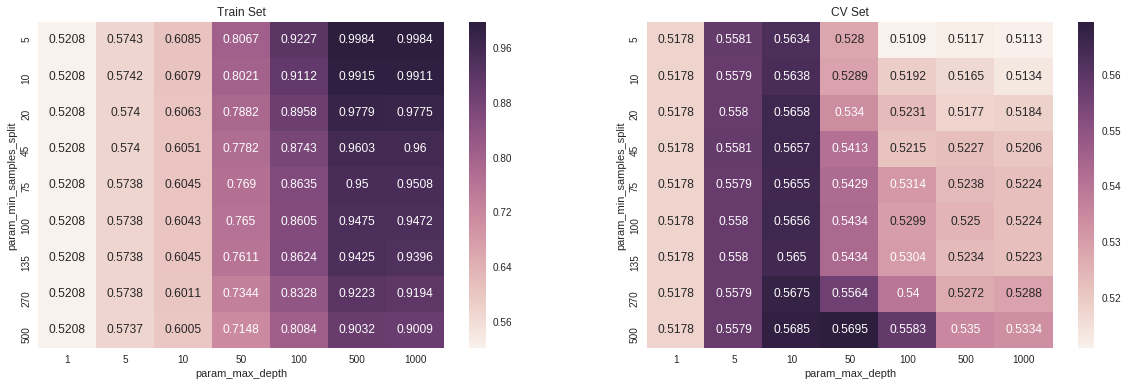

In [76]:
import seaborn as sns; sns.set()


max_scores1 = pd.DataFrame(clf1.cv_results_).groupby(['param_min_samples_split', 'param_max_depth']).max().unstack()[['mean_test_score', 'mean_train_score']]


fig, ax = plt.subplots(1,2, figsize=(20,6))

sns.heatmap(max_scores1.mean_train_score, annot = True, fmt='.4g', ax=ax[0])
sns.heatmap(max_scores1.mean_test_score, annot = True, fmt='.4g', ax=ax[1])

ax[0].set_title('Train Set')
ax[1].set_title('CV Set')

plt.show()

### SET2

In [0]:
dt2 = DecisionTreeClassifier()
clf2 = GridSearchCV(dt2, parameters, cv=3, scoring='roc_auc')
se2 = clf2.fit(X_tr2, y_train)

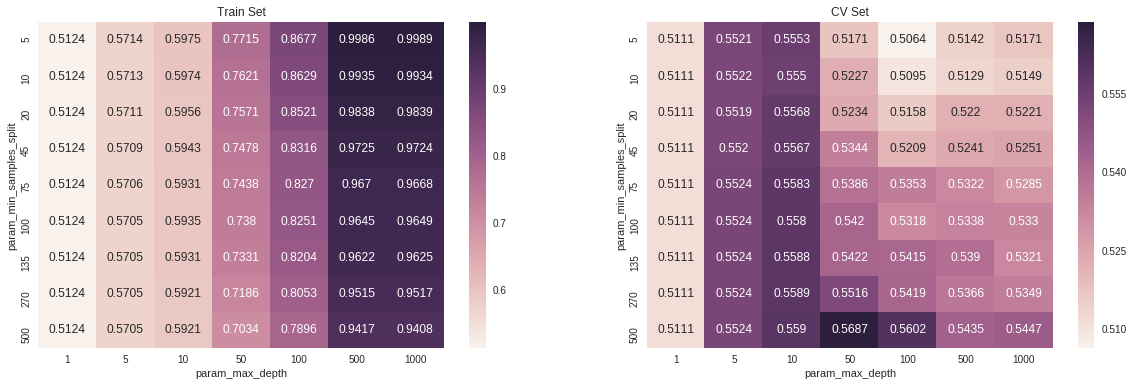

In [78]:
max_scores2 = pd.DataFrame(clf2.cv_results_).groupby(['param_min_samples_split', 'param_max_depth']).max().unstack()[['mean_test_score', 'mean_train_score']]

fig, ax = plt.subplots(1,2, figsize=(20,6))

sns.heatmap(max_scores2.mean_train_score, annot = True, fmt='.4g', ax=ax[0])
sns.heatmap(max_scores2.mean_test_score, annot = True, fmt='.4g', ax=ax[1])

ax[0].set_title('Train Set')
ax[1].set_title('CV Set')

plt.show()

### SET3

In [0]:
dt3 = DecisionTreeClassifier()
clf3 = GridSearchCV(dt3, parameters, cv=3, scoring='roc_auc')
se3 = clf3.fit(X_tr3, y_train)

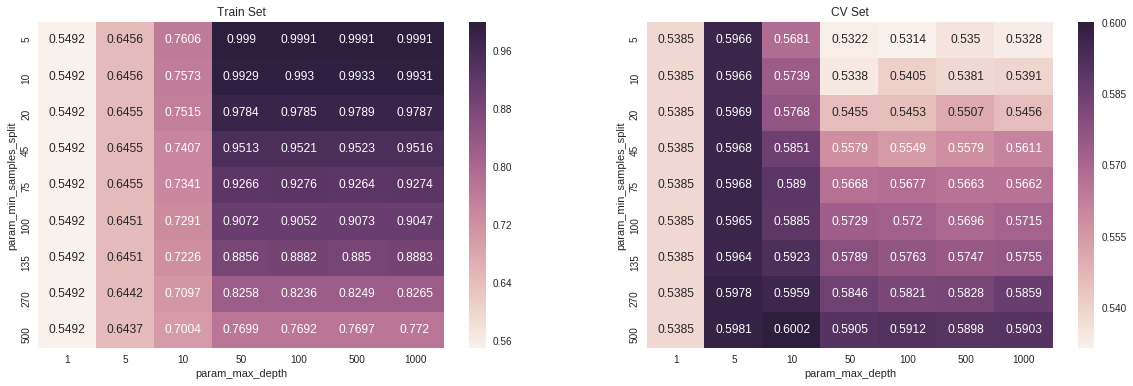

In [80]:
max_scores3 = pd.DataFrame(clf3.cv_results_).groupby(['param_min_samples_split', 'param_max_depth']).max().unstack()[['mean_test_score', 'mean_train_score']]

fig, ax = plt.subplots(1,2, figsize=(20,6))

sns.heatmap(max_scores3.mean_train_score, annot = True, fmt='.4g', ax=ax[0])
sns.heatmap(max_scores3.mean_test_score, annot = True, fmt='.4g', ax=ax[1])

ax[0].set_title('Train Set')
ax[1].set_title('CV Set')

plt.show()

### SET4

In [0]:
dt4 = DecisionTreeClassifier()
clf4 = GridSearchCV(dt4, parameters, cv=3, scoring='roc_auc')
se4 = clf4.fit(X_tr4, y_train)

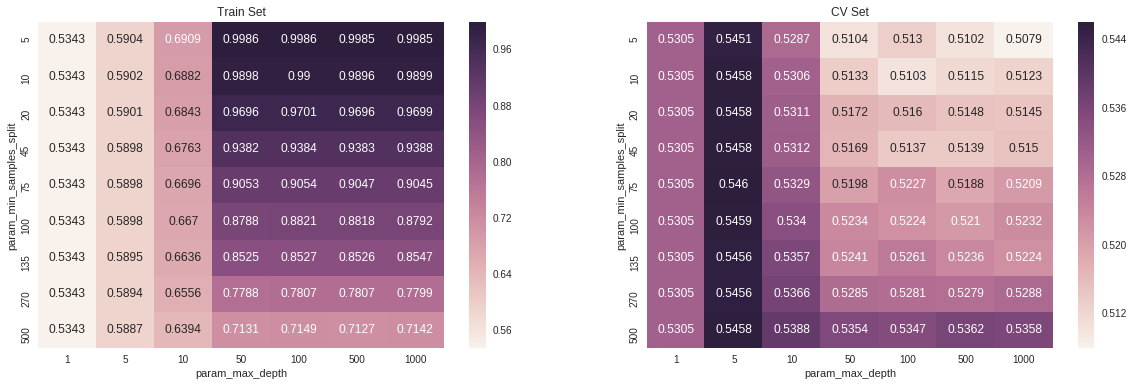

In [82]:
max_scores4 = pd.DataFrame(clf4.cv_results_).groupby(['param_min_samples_split', 'param_max_depth']).max().unstack()[['mean_test_score', 'mean_train_score']]

fig, ax = plt.subplots(1,2, figsize=(20,6))

sns.heatmap(max_scores4.mean_train_score, annot = True, fmt='.4g', ax=ax[0])
sns.heatmap(max_scores4.mean_test_score, annot = True, fmt='.4g', ax=ax[1])

ax[0].set_title('Train Set')
ax[1].set_title('CV Set')

plt.show()

### ROC Curve

#### SET1

In [0]:
def batch_predict(clf, data):
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs

    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
    # consider you X_tr shape is 49041, then your cr_loop will be 49041 - 49041%1000 = 49000
    # in this for loop we will iterate unti the last 1000 multiplier
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    # we will be predicting for the last data points
    y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    
    return y_data_pred

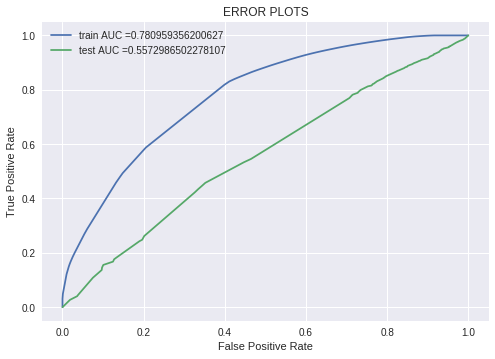

In [208]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc


clf11 = DecisionTreeClassifier(max_depth = 100, min_samples_split = 500)
clfV1 = DecisionTreeClassifier(max_depth = 3, min_samples_split = 500)

clf11.fit(X_tr1, y_train)
clfV1.fit(X_tr1, y_train)

# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred1 = batch_predict(clf11, X_tr1)    
y_test_pred1 = batch_predict(clf11, X_te1)

train_fpr1, train_tpr1, tr_thresholds1 = roc_curve(y_train, y_train_pred1)
test_fpr1, test_tpr1, te_thresholds1 = roc_curve(y_test, y_test_pred1)

plt.plot(train_fpr1, train_tpr1, label="train AUC ="+str(auc(train_fpr1, train_tpr1)))
plt.plot(test_fpr1, test_tpr1, label="test AUC ="+str(auc(test_fpr1, test_tpr1)))
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ERROR PLOTS")
plt.grid(True)
plt.show()

#### Confusion Matrix

In [0]:
def predict(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(fpr*(1-tpr))]
    
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    global predictions1
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
               
    predictions1 = predictions
    return predictions

the maximum value of tpr*(1-fpr) 0.4919176628162578 for threshold 0.899
the maximum value of tpr*(1-fpr) 0.2965430348465123 for threshold 0.899


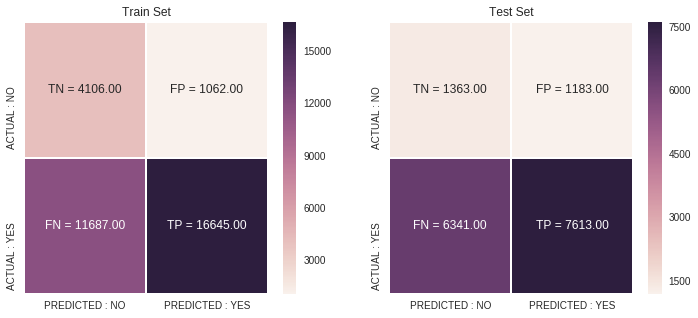

In [210]:
#https://www.quantinsti.com/blog/creating-heatmap-using-python-seaborn
import seaborn as sns; sns.set()

con_m_train = confusion_matrix(y_train, predict(y_train_pred1, tr_thresholds1, train_fpr1, train_tpr1))
con_m_test = confusion_matrix(y_test, predict(y_test_pred1, te_thresholds1, test_fpr1, test_tpr1))

key = (np.asarray([['TN','FP'], ['FN', 'TP']]))

fig, ax = plt.subplots(1,2, figsize=(12,5)) 

labels_train = (np.asarray(["{0} = {1:.2f}" .format(key, value) for key, value in zip(key.flatten(), con_m_train.flatten())])).reshape(2,2)
labels_test = (np.asarray(["{0} = {1:.2f}" .format(key, value) for key, value in zip(key.flatten(), con_m_test.flatten())])).reshape(2,2)

sns.heatmap(con_m_train, linewidths=.5, xticklabels=['PREDICTED : NO', 'PREDICTED : YES'], yticklabels=['ACTUAL : NO', 'ACTUAL : YES'], annot = labels_train, fmt = '', ax=ax[0])
sns.heatmap(con_m_test, linewidths=.5, xticklabels=['PREDICTED : NO', 'PREDICTED : YES'], yticklabels=['ACTUAL : NO', 'ACTUAL : YES'], annot = labels_test, fmt = '', ax=ax[1])

ax[0].set_title('Train Set')
ax[1].set_title('Test Set')

plt.show()

## Visualizing Decision Tree

In [0]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

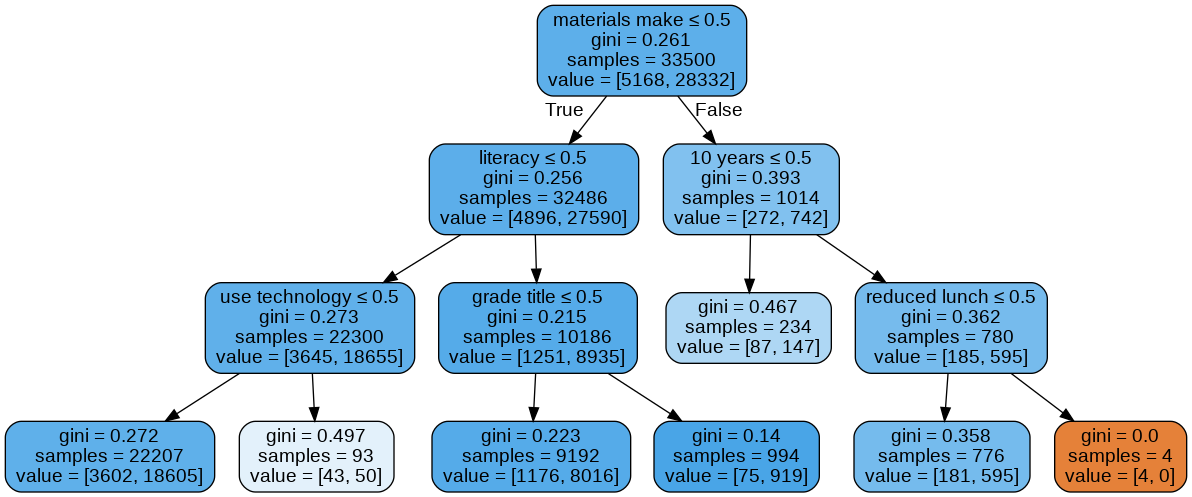

In [212]:
dot_data = StringIO()

#dt_feat_names = list(X_test.columns)
#dt_target_names = [str(s) for s in [0,1]]
export_graphviz(clfV1, out_file=dot_data, filled=True, rounded=True, special_characters=True, feature_names=feature_agg_bow)
                
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

## False Positives Retrieval

In [0]:
fpi = []
for i in range(len(y_test)) :
  if (y_test[i] == 0) & (predictions1[i] == 1) :
    fpi.append(i)

In [0]:
fp_essay1 = []
for i in fpi :
  fp_essay1.append(X_test['clean_essay'][i])

In [215]:
len(fp_essay1)

1183

## Word Cloud (False positives essay)

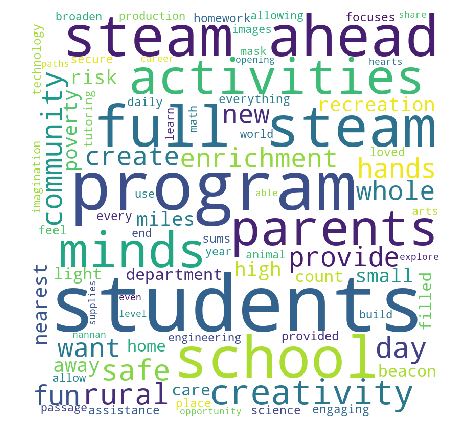

In [216]:
from wordcloud import WordCloud, STOPWORDS 

comment_words = ' '
stopwords = set(STOPWORDS) 

for val in fp_essay1 :
  val = str(val)
  tokens = val.split()
  
for i in range(len(tokens)):
  tokens[i] = tokens[i].lower()
  
for words in tokens :
  comment_words = comment_words + words + ' '

wordcloud = WordCloud(width = 800, height = 800, background_color ='white', stopwords = stopwords, min_font_size = 10).generate(comment_words)
  

plt.figure(figsize = (6, 6), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show() 

## Building DataFrame of False Positives

In [217]:
X_test.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0       48844  p004342  2eb265ac8f1c0ec610418aa453c1b719           Mrs.   
1      163799  p259052  bb090460b4bb36582610caf63a9a6677           Mrs.   

  school_state                Date project_grade_category  \
0           IN 2017-03-07 09:47:55             Grades 3-5   
1           MI 2016-12-21 10:21:35             Grades 6-8   

                                     project_essay_1  \
0  My students are a fun and energetic group of k...   
1  Hi! My name is Michelle, and I am a resource r...   

                                     project_essay_2 project_essay_3  \
0  Students will use the items in this project da...             NaN   
1  These chairs are ideal for those who like to w...             NaN   

  project_essay_4                           project_resource_summary  \
0             NaN  My students need high quality headphones to he...   
1             NaN  My students need 6 wobble chairs to engage in ...   

   teacher_number_of_previously_posted_projects  \
0                                             2   
1                                             0   

                 clean_categories       clean_subcategories  \
0  Literacy_Language SpecialNeeds     Literacy SpecialNeeds   
1       Math_Science SpecialNeeds  Mathematics SpecialNeeds   

                                         clean_essay  \
0  students fun energetic group kids variety need...   
1  hi name michelle resource room teacher student...   

                            clean_project_title  price  quantity  
0  headphones fostering individualized learning  19.99        27  
1                           wobble why you work  69.99         6

In [0]:
cols = X_test.columns
X_test_falsePos1 = pd.DataFrame(columns=cols)

In [0]:
for i in fpi :
  X_test_falsePos1 = X_test_falsePos1.append(X_test.filter(items=[i], axis=0))

In [220]:
len(X_test_falsePos1)

1183

In [221]:
X_test_falsePos1.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
15      66363  p125808  11f8bb9e7eb14085480abad8189f48c4            Mr.   
24     129076  p070479  7780f6d9ef0e335c031a02caf439d8b8            Ms.   

   school_state                Date project_grade_category  \
15           CO 2016-11-27 20:20:34             Grades 3-5   
24           SC 2016-07-28 23:09:23          Grades PreK-2   

                                      project_essay_1  \
15  Students in my classroom are eager for knowled...   
24  My students come from a wide range of backgrou...   

                                      project_essay_2 project_essay_3  \
15  The implementation of chrome books in my class...             NaN   
24  My project will give each student in my class ...             NaN   

   project_essay_4                           project_resource_summary  \
15             NaN  My students need a set of 2 chrome books, so t...   
24             NaN  My students need the resources, motivation (st...   

   teacher_number_of_previously_posted_projects  \
15                                            1   
24                                            0   

                  clean_categories          clean_subcategories  \
15  Literacy_Language Math_Science         Literacy Mathematics   
24               Literacy_Language  Literacy Literature_Writing   

                                          clean_essay  \
15  students classroom eager knowledge love learni...   
24  students come wide range backgrounds including...   

             clean_project_title   price quantity  
15  chromebooks enhance learning  158.63        2  
24       read with a buddy r wab  178.00        2

## Box Plot (FP 'price')

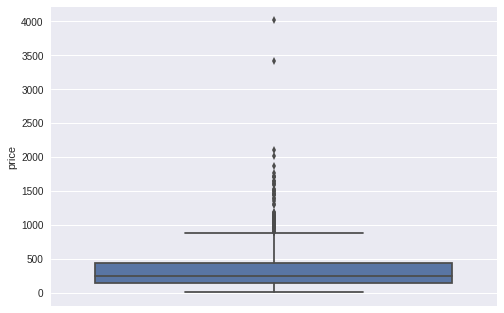

In [222]:
ax = sns.boxplot(y='price', data=X_test_falsePos1)

## PDF on FP TNPPP

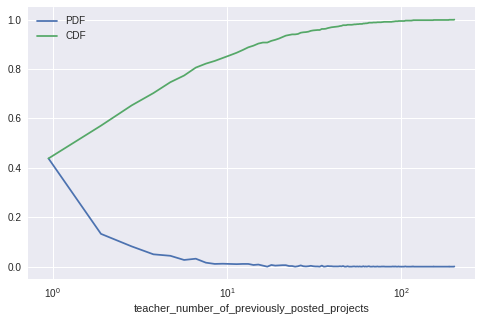

In [223]:
plt.figure(figsize=(8,5))

counts, bin_edges = np.histogram(X_test_falsePos1['teacher_number_of_previously_posted_projects'], bins='auto', density=True)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
pdfP, = plt.plot(bin_edges[1:], pdf)
cdfP, = plt.plot(bin_edges[1:], cdf)
plt.legend([pdfP, cdfP], ["PDF", "CDF"]) 
plt.xscale('log')
plt.xlabel('teacher_number_of_previously_posted_projects')    
plt.show()    

#### SET2

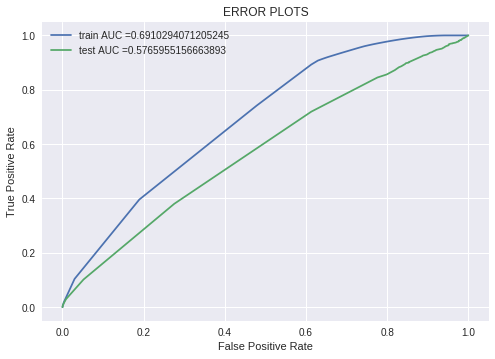

In [224]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve


from sklearn.metrics import roc_curve, auc
from sklearn.feature_extraction import DictVectorizer


clf2 = DecisionTreeClassifier(max_depth = 50, min_samples_split = 500)
clfV2 = DecisionTreeClassifier(max_depth = 3, min_samples_split = 500)

#vect = DictVectorizer(sparse=False)
#trans = vect.fit_transform(X_te2)

clf2.fit(X_tr2, y_train)
clfV2.fit(X_tr2, y_train)

# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred2 = batch_predict(clf2, X_tr2)    
y_test_pred2 = batch_predict(clf2, X_te2)

train_fpr2, train_tpr2, tr_thresholds2 = roc_curve(y_train, y_train_pred2)
test_fpr2, test_tpr2, te_thresholds2 = roc_curve(y_test, y_test_pred2)

plt.plot(train_fpr2, train_tpr2, label="train AUC ="+str(auc(train_fpr2, train_tpr2)))
plt.plot(test_fpr2, test_tpr2, label="test AUC ="+str(auc(test_fpr2, test_tpr2)))
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ERROR PLOTS")
plt.grid(True)
plt.show()

#### Confusion Matrix

In [0]:
def predict(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(fpr*(1-tpr))]
    
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    global predictions2
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    
    predictions2 = predictions
    return predictions

the maximum value of tpr*(1-fpr) 0.3867721871122109 for threshold 0.868
the maximum value of tpr*(1-fpr) 0.2783638441243538 for threshold 0.868


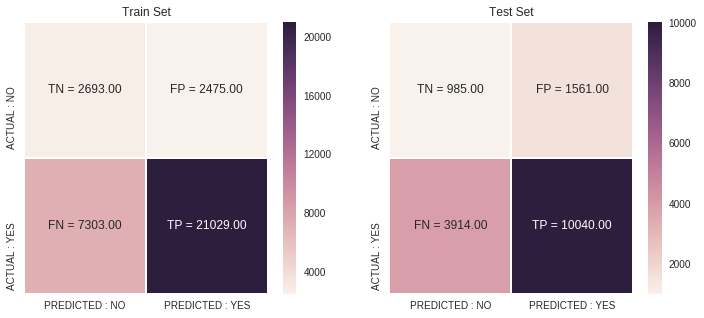

In [226]:
#https://www.quantinsti.com/blog/creating-heatmap-using-python-seaborn
import seaborn as sns; sns.set()

con_m_train = confusion_matrix(y_train, predict(y_train_pred2, tr_thresholds2, train_fpr2, train_tpr2))
con_m_test = confusion_matrix(y_test, predict(y_test_pred2, te_thresholds2, test_fpr2, test_tpr2))

key = (np.asarray([['TN','FP'], ['FN', 'TP']]))

fig, ax = plt.subplots(1,2, figsize=(12,5)) 

labels_train = (np.asarray(["{0} = {1:.2f}" .format(key, value) for key, value in zip(key.flatten(), con_m_train.flatten())])).reshape(2,2)
labels_test = (np.asarray(["{0} = {1:.2f}" .format(key, value) for key, value in zip(key.flatten(), con_m_test.flatten())])).reshape(2,2)

sns.heatmap(con_m_train, linewidths=.5, xticklabels=['PREDICTED : NO', 'PREDICTED : YES'], yticklabels=['ACTUAL : NO', 'ACTUAL : YES'], annot = labels_train, fmt = '', ax=ax[0])
sns.heatmap(con_m_test, linewidths=.5, xticklabels=['PREDICTED : NO', 'PREDICTED : YES'], yticklabels=['ACTUAL : NO', 'ACTUAL : YES'], annot = labels_test, fmt = '', ax=ax[1])

ax[0].set_title('Train Set')
ax[1].set_title('Test Set')

plt.show()

## Visualizing Decision Tree

In [0]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

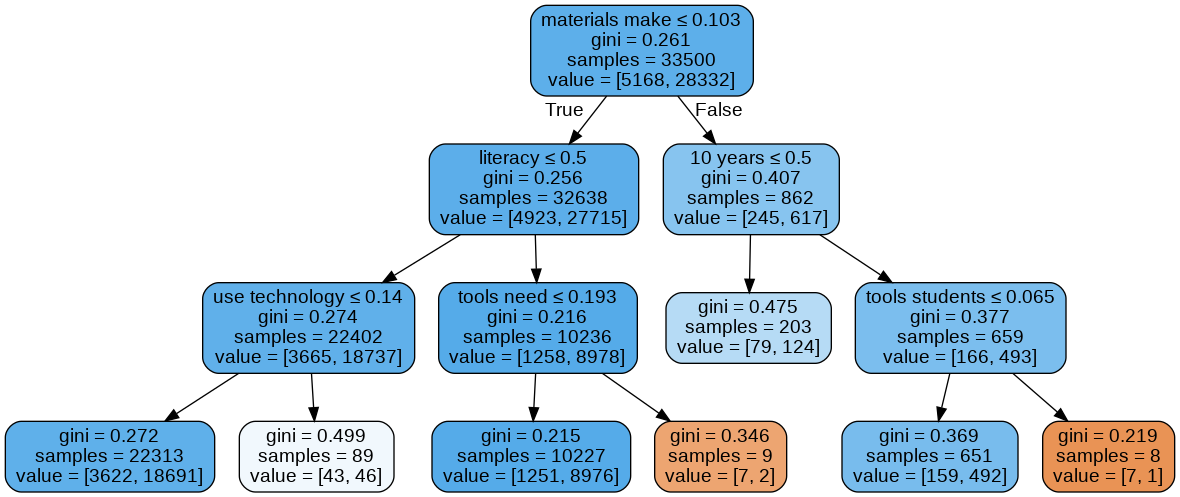

In [228]:
dot_dataT = StringIO()

export_graphviz(clfV2, out_file=dot_dataT, filled=True, rounded=True, special_characters=True, feature_names=feature_agg_tfidf)
                
graph = pydotplus.graph_from_dot_data(dot_dataT.getvalue())  
Image(graph.create_png())

## False Positives Retrieval

In [0]:
fpi = []
for i in range(len(y_test)) :
  if (y_test[i] == 0) & (predictions2[i] == 1) :
    fpi.append(i)

In [0]:
fp_essay2 = []
for i in fpi :
  fp_essay2.append(X_test['clean_essay'][i])

In [231]:
len(fp_essay2)

1561

## Word Cloud (False Positives Essay)

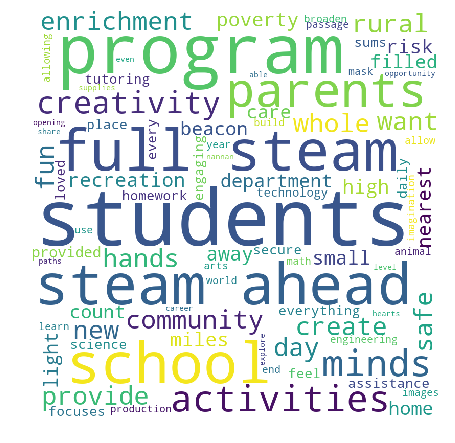

In [232]:
from wordcloud import WordCloud, STOPWORDS 

comment_words = ' '
stopwords = set(STOPWORDS) 

for val in fp_essay2 :
  val = str(val)
  tokens = val.split()
  
for i in range(len(tokens)):
  tokens[i] = tokens[i].lower()
  
for words in tokens :
  comment_words = comment_words + words + ' '

wordcloud = WordCloud(width = 800, height = 800, background_color ='white', stopwords = stopwords, min_font_size = 10).generate(comment_words)
  

plt.figure(figsize = (6, 6), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show() 

## Building DataFrames of False Positives

In [0]:
cols = X_test.columns
X_test_falsePos2 = pd.DataFrame(columns=cols)

for i in fpi :
  X_test_falsePos2 = X_test_falsePos2.append(X_test.filter(items=[i], axis=0))

# Box Plot on FP 'price'

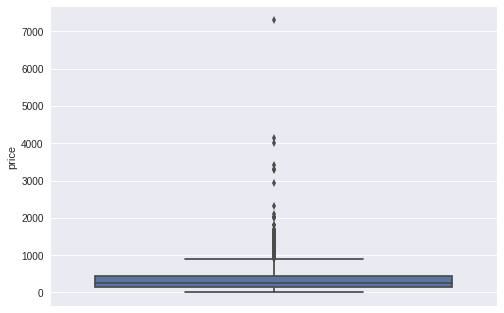

In [234]:
ax = sns.boxplot(y='price', data=X_test_falsePos2)

## PDF on FP TNPPP

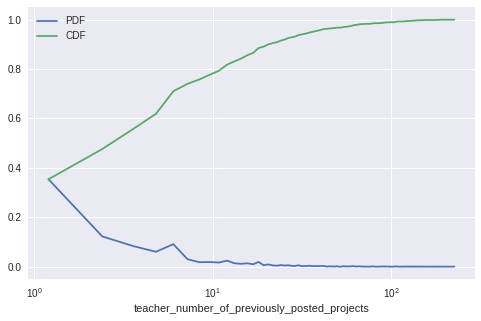

In [235]:
plt.figure(figsize=(8,5))

counts, bin_edges = np.histogram(X_test_falsePos2['teacher_number_of_previously_posted_projects'], bins='auto', density=True)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
pdfP, = plt.plot(bin_edges[1:], pdf)
cdfP, = plt.plot(bin_edges[1:], cdf)
plt.xscale('log')
plt.legend([pdfP, cdfP], ["PDF", "CDF"])    
plt.xlabel('teacher_number_of_previously_posted_projects')    
plt.show()    

#### SET3

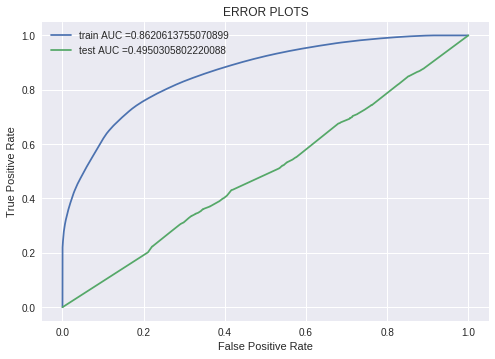

In [236]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve

from sklearn.metrics import roc_curve, auc


clf3 = DecisionTreeClassifier(max_depth = 25, min_samples_split = 135);
clf3.fit(X_tr3, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred3 = batch_predict(clf3, X_tr3)    
y_test_pred3 = batch_predict(clf3, X_te3)

train_fpr3, train_tpr3, tr_thresholds3 = roc_curve(y_train, y_train_pred3)
test_fpr3, test_tpr3, te_thresholds3 = roc_curve(y_test, y_test_pred3)

plt.plot(train_fpr3, train_tpr3, label="train AUC ="+str(auc(train_fpr3, train_tpr3)))
plt.plot(test_fpr3, test_tpr3, label="test AUC ="+str(auc(test_fpr3, test_tpr3)))
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ERROR PLOTS")
plt.grid(True)
plt.show()

#### Confusion Matrix

In [0]:
def predict(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(fpr*(1-tpr))]
    
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    global predictions3
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    
    predictions3 = predictions
    return predictions

the maximum value of tpr*(1-fpr) 0.6073275921416518 for threshold 0.786
the maximum value of tpr*(1-fpr) 0.2515922871254343 for threshold 0.775


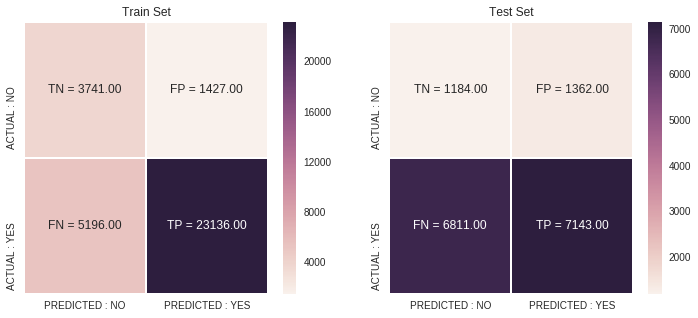

In [238]:
#https://www.quantinsti.com/blog/creating-heatmap-using-python-seaborn
import seaborn as sns; sns.set()

con_m_train = confusion_matrix(y_train, predict(y_train_pred3, tr_thresholds3, train_fpr3, train_tpr3))
con_m_test = confusion_matrix(y_test, predict(y_test_pred3, te_thresholds3, test_fpr3, test_tpr3))

key = (np.asarray([['TN','FP'], ['FN', 'TP']]))

fig, ax = plt.subplots(1,2, figsize=(12,5)) 

labels_train = (np.asarray(["{0} = {1:.2f}" .format(key, value) for key, value in zip(key.flatten(), con_m_train.flatten())])).reshape(2,2)
labels_test = (np.asarray(["{0} = {1:.2f}" .format(key, value) for key, value in zip(key.flatten(), con_m_test.flatten())])).reshape(2,2)

sns.heatmap(con_m_train, linewidths=.5, xticklabels=['PREDICTED : NO', 'PREDICTED : YES'], yticklabels=['ACTUAL : NO', 'ACTUAL : YES'], annot = labels_train, fmt = '', ax=ax[0])
sns.heatmap(con_m_test, linewidths=.5, xticklabels=['PREDICTED : NO', 'PREDICTED : YES'], yticklabels=['ACTUAL : NO', 'ACTUAL : YES'], annot = labels_test, fmt = '', ax=ax[1])

ax[0].set_title('Train Set')
ax[1].set_title('Test Set')

plt.show()

## False Positives Retrieval

In [0]:
fpi = []
for i in range(len(y_test)) :
  if (y_test[i] == 0) & (predictions3[i] == 1) :
    fpi.append(i)
    
    
fp_essay3 = []
for i in fpi :
  fp_essay3.append(X_test['clean_essay'][i])

## WordCloud on FP 'essay'

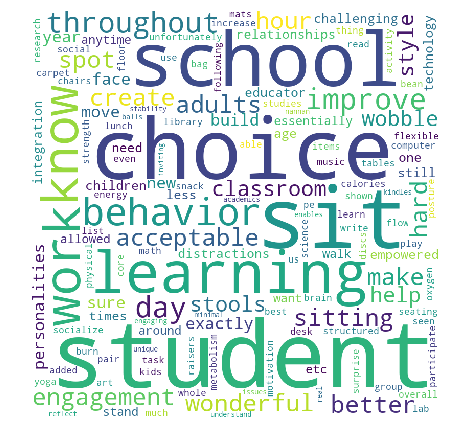

In [240]:
from wordcloud import WordCloud, STOPWORDS 

comment_words = ' '
stopwords = set(STOPWORDS) 

for val in fp_essay3 :
  val = str(val)
  tokens = val.split()
  
for i in range(len(tokens)):
  tokens[i] = tokens[i].lower()
  
for words in tokens :
  comment_words = comment_words + words + ' '

wordcloud = WordCloud(width = 800, height = 800, background_color ='white', stopwords = stopwords, min_font_size = 10).generate(comment_words)
  

plt.figure(figsize = (6, 6), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show() 

## Building DataFrames of False Positives

In [0]:
cols = X_test.columns
X_test_falsePos3 = pd.DataFrame(columns=cols)

for i in fpi :
  X_test_falsePos3 = X_test_falsePos3.append(X_test.filter(items=[i], axis=0))

## BoxPlot on FP 'price'

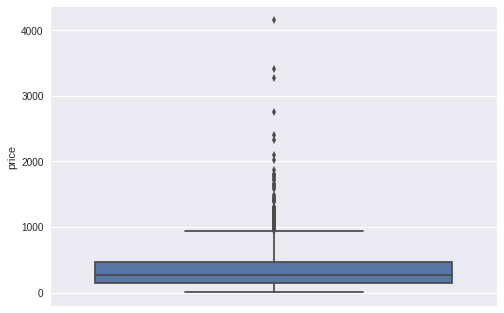

In [242]:
ax = sns.boxplot(y='price', data=X_test_falsePos3)

## PDF on FP TNPPP

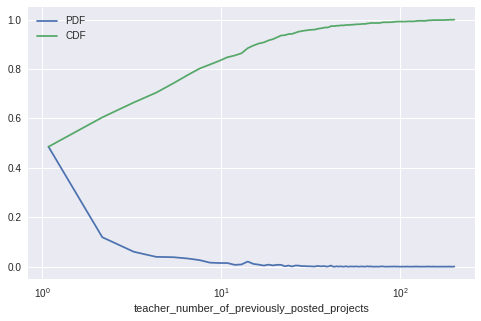

In [243]:
plt.figure(figsize=(8,5))

counts, bin_edges = np.histogram(X_test_falsePos3['teacher_number_of_previously_posted_projects'], bins='auto', density=True)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
pdfP, = plt.plot(bin_edges[1:], pdf)
cdfP, = plt.plot(bin_edges[1:], cdf)
plt.xscale('log')
plt.legend([pdfP, cdfP], ["PDF", "CDF"])    
plt.xlabel('teacher_number_of_previously_posted_projects')    
plt.show()    

#### SET4

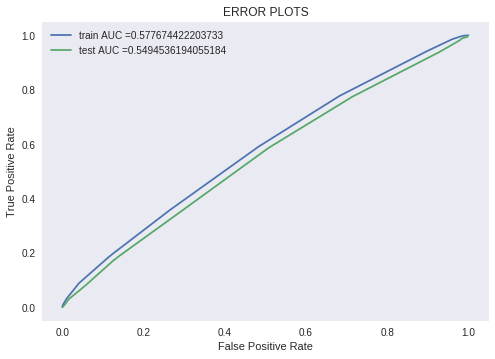

In [244]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve


from sklearn.metrics import roc_curve, auc


clf4 = DecisionTreeClassifier(max_depth = 5, min_samples_split = 100);
clf4.fit(X_tr4, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred4 = batch_predict(clf4, X_tr4)    
y_test_pred4 = batch_predict(clf4, X_te4)

train_fpr4, train_tpr4, tr_thresholds4 = roc_curve(y_train, y_train_pred4)
test_fpr4, test_tpr4, te_thresholds4 = roc_curve(y_test, y_test_pred4)

plt.plot(train_fpr4, train_tpr4, label="train AUC ="+str(auc(train_fpr4, train_tpr4)))
plt.plot(test_fpr4, test_tpr4, label="test AUC ="+str(auc(test_fpr4, test_tpr4)))
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

#### Confusion Matrix

In [0]:
def predict(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(fpr*(1-tpr))]
    
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    global predictions4
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    
    predictions4 = predictions
    return predictions

the maximum value of tpr*(1-fpr) 0.3053076723734368 for threshold 0.854
the maximum value of tpr*(1-fpr) 0.2885009560647086 for threshold 0.854


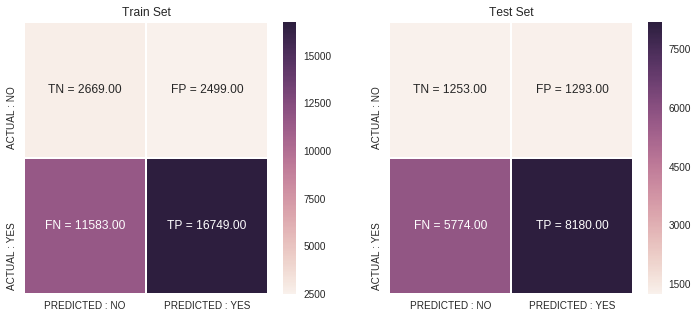

In [246]:
#https://www.quantinsti.com/blog/creating-heatmap-using-python-seaborn
import seaborn as sns; sns.set()

con_m_train = confusion_matrix(y_train, predict(y_train_pred4, tr_thresholds4, train_fpr4, train_tpr4))
con_m_test = confusion_matrix(y_test, predict(y_test_pred4, te_thresholds4, test_fpr4, test_tpr4))

key = (np.asarray([['TN','FP'], ['FN', 'TP']]))

fig, ax = plt.subplots(1,2, figsize=(12,5)) 

labels_train = (np.asarray(["{0} = {1:.2f}" .format(key, value) for key, value in zip(key.flatten(), con_m_train.flatten())])).reshape(2,2)
labels_test = (np.asarray(["{0} = {1:.2f}" .format(key, value) for key, value in zip(key.flatten(), con_m_test.flatten())])).reshape(2,2)

sns.heatmap(con_m_train, linewidths=.5, xticklabels=['PREDICTED : NO', 'PREDICTED : YES'], yticklabels=['ACTUAL : NO', 'ACTUAL : YES'], annot = labels_train, fmt = '', ax=ax[0])
sns.heatmap(con_m_test, linewidths=.5, xticklabels=['PREDICTED : NO', 'PREDICTED : YES'], yticklabels=['ACTUAL : NO', 'ACTUAL : YES'], annot = labels_test, fmt = '', ax=ax[1])

ax[0].set_title('Train Set')
ax[1].set_title('Test Set')

plt.show()

In [0]:
## Flase Positives Retrieval

In [0]:
fpi = []
for i in range(len(y_test)) :
  if (y_test[i] == 0) & (predictions4[i] == 1) :
    fpi.append(i)
    
    
fp_essay4 = []
for i in fpi :
  fp_essay4.append(X_test['clean_essay'][i])

## WordCloud on FP 'essay'

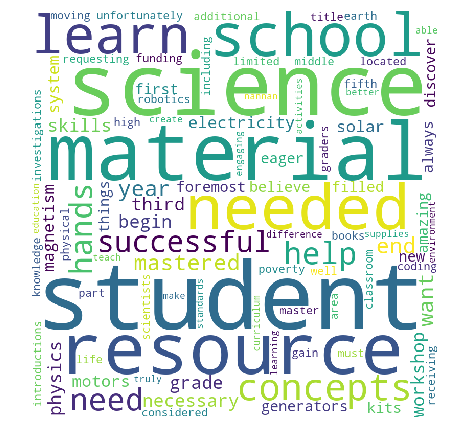

In [248]:
from wordcloud import WordCloud, STOPWORDS 

comment_words = ' '
stopwords = set(STOPWORDS) 

for val in fp_essay4 :
  val = str(val)
  tokens = val.split()
  
for i in range(len(tokens)):
  tokens[i] = tokens[i].lower()
  
for words in tokens :
  comment_words = comment_words + words + ' '

wordcloud = WordCloud(width = 800, height = 800, background_color ='white', stopwords = stopwords, min_font_size = 10).generate(comment_words)
  

plt.figure(figsize = (6, 6), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show() 

## Building DataFrames of False Positives

In [0]:
cols = X_test.columns
X_test_falsePos4 = pd.DataFrame(columns=cols)

for i in fpi :
  X_test_falsePos4 = X_test_falsePos4.append(X_test.filter(items=[i], axis=0))

## BoxPlot on FP 'price'

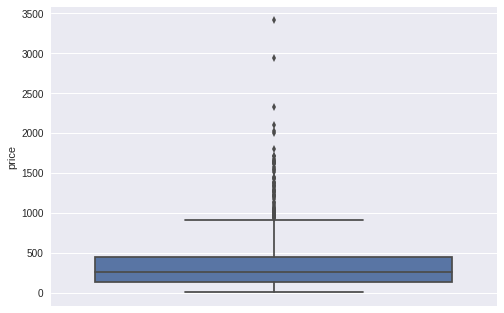

In [250]:
ax = sns.boxplot(y='price', data=X_test_falsePos4)

## PDF on FP TNPPP

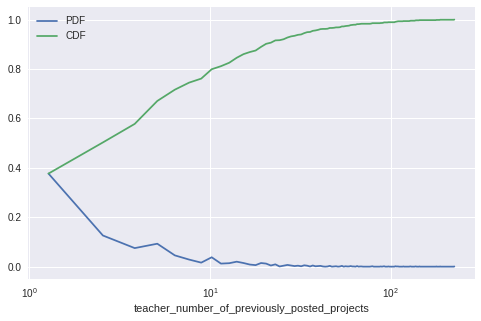

In [251]:
plt.figure(figsize=(8,5))

counts, bin_edges = np.histogram(X_test_falsePos4['teacher_number_of_previously_posted_projects'], bins='auto', density=True)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
pdfP, = plt.plot(bin_edges[1:], pdf)
cdfP, = plt.plot(bin_edges[1:], cdf)
plt.xscale('log')
plt.legend([pdfP, cdfP], ["PDF", "CDF"])    
plt.xlabel('teacher_number_of_previously_posted_projects')    
plt.show()    

# Selecting 5K best features using feature_importance_

In [0]:
# https://datascience.stackexchange.com/questions/6683/feature-selection-using-feature-importances-in-random-forests-with-scikit-learn

def selectKImportance(model, X, k=5):
     return X[:,model.feature_importances_.argsort()[::-1][:k]]

In [0]:
newX_tr = selectKImportance(clf2, X_tr2, 5000)
newX_te = selectKImportance(clf2, X_te2, 5000)

In [0]:
newX_tr.shape

<h2>2.5 Logistic Regression with added Features `Set 5` </h2>

## Learning Curve (AUC)

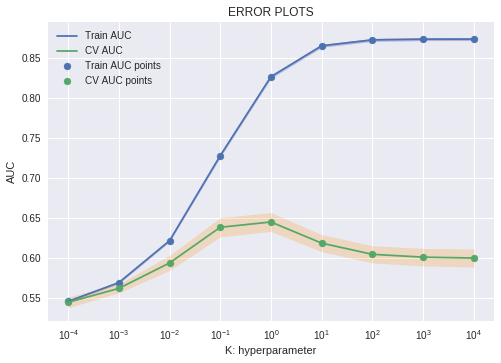

[0.54616847 0.56961267 0.62197373 0.72827207 0.82697625 0.8656096
 0.87298182 0.87389093 0.87400034]
[0.54497274 0.56236013 0.59414645 0.63877817 0.64537214 0.61894395
 0.60495494 0.60143483 0.60031549]


In [254]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

lr1 = LogisticRegression()

parameters = {'C': [10**-4, 10**-3, 10**-2, 10**-1, 10**0, 10**1, 10**2, 10**3, 10**4]}
#parameters = {'alpha':[0.0001, 0.0025, 0.0005, 0.0075, 0.001, 0.025, .005, 0.075, 0.1, 0.25, 0.5, 0.75, 1]} 

clf = GridSearchCV(lr1, parameters, cv=7, scoring='roc_auc')
clr4 = clf.fit(newX_tr, y_train)

train_auc4= clf.cv_results_['mean_train_score']
train_auc_std4= clf.cv_results_['std_train_score']
cv_auc4 = clf.cv_results_['mean_test_score'] 
cv_auc_std4 = clf.cv_results_['std_test_score']

plt.plot(parameters['C'], train_auc4, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(parameters['C'],train_auc4 - train_auc_std4,train_auc4 + train_auc_std4,alpha=0.2,color='darkblue')

plt.plot(parameters['C'], cv_auc4, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(parameters['C'],cv_auc4 - cv_auc_std4, cv_auc4 + cv_auc_std4,alpha=0.2,color='darkorange')

plt.scatter(parameters['C'], train_auc4, label='Train AUC points')
plt.scatter(parameters['C'], cv_auc4, label='CV AUC points')

plt.xscale('log')
plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid(True)
plt.show()

print(train_auc4)
print(cv_auc4)       #k_best = 10**-2



### ROC Curve

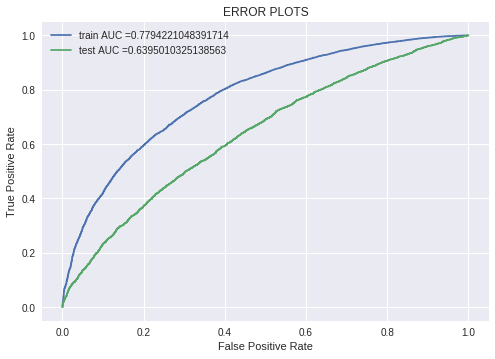

In [255]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve


from sklearn.metrics import roc_curve, auc


clf5 = LogisticRegression(C=1, penalty='l1');
clf5.fit(newX_tr, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred4 = batch_predict(clf5, newX_tr)    
y_test_pred4 = batch_predict(clf5, newX_te)

train_fpr4, train_tpr4, tr_thresholds4 = roc_curve(y_train, y_train_pred4)
test_fpr4, test_tpr4, te_thresholds4 = roc_curve(y_test, y_test_pred4)

plt.plot(train_fpr4, train_tpr4, label="train AUC ="+str(auc(train_fpr4, train_tpr4)))
plt.plot(test_fpr4, test_tpr4, label="test AUC ="+str(auc(test_fpr4, test_tpr4)))
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ERROR PLOTS")
plt.grid(True)
plt.show()

### Confusion Matrix

In [0]:
def predict(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(fpr*(1-tpr))]
    
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

the maximum value of tpr*(1-fpr) 0.4981432972551468 for threshold 0.84
the maximum value of tpr*(1-fpr) 0.35834299456152696 for threshold 0.866


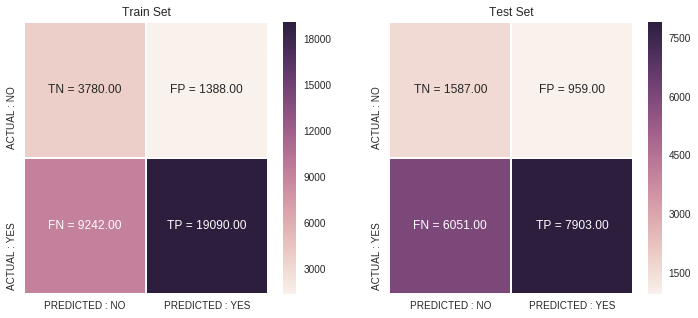

In [257]:
#https://www.quantinsti.com/blog/creating-heatmap-using-python-seaborn
import seaborn as sns; sns.set()

con_m_train = confusion_matrix(y_train, predict(y_train_pred4, tr_thresholds4, train_fpr4, train_tpr4))
con_m_test = confusion_matrix(y_test, predict(y_test_pred4, te_thresholds4, test_fpr4, test_tpr4))

key = (np.asarray([['TN','FP'], ['FN', 'TP']]))

fig, ax = plt.subplots(1,2, figsize=(12,5)) 

labels_train = (np.asarray(["{0} = {1:.2f}" .format(key, value) for key, value in zip(key.flatten(), con_m_train.flatten())])).reshape(2,2)
labels_test = (np.asarray(["{0} = {1:.2f}" .format(key, value) for key, value in zip(key.flatten(), con_m_test.flatten())])).reshape(2,2)

sns.heatmap(con_m_train, linewidths=.5, xticklabels=['PREDICTED : NO', 'PREDICTED : YES'], yticklabels=['ACTUAL : NO', 'ACTUAL : YES'], annot = labels_train, fmt = '', ax=ax[0])
sns.heatmap(con_m_test, linewidths=.5, xticklabels=['PREDICTED : NO', 'PREDICTED : YES'], yticklabels=['ACTUAL : NO', 'ACTUAL : YES'], annot = labels_test, fmt = '', ax=ax[1])

ax[0].set_title('Train Set')
ax[1].set_title('Test Set')

plt.show()

<h1>3. Conclusions</h1>

In [259]:
# Please compare all your models using Prettytable library

# Please compare all your models using Prettytable library

from prettytable import PrettyTable

x = PrettyTable()
x.field_names = ["Vectorizer", "Model", "HyperParameter1(max_depth)/C", "Hyperparameter2(min smaple split)", "AUC"]
                 
x.add_row(["BOW",         "Decision Trees",      10**2, 500, 0.557])
x.add_row(["TFIDF",       "Decision Trees",      50, 500   ,  0.576])
x.add_row(["Avg W2V",     "Decision Treesn",     25, 135,    0.495])
x.add_row(["TFIDF-W2v",   "Decision Trees",      5, 100 ,  0.549])
x.add_row(["Best 5K",     "Logistic Regression", 1, "NULL",  0.639])


                 
print(x)

+------------+---------------------+------------------------------+-----------------------------------+-------+
| Vectorizer |        Model        | HyperParameter1(max_depth)/C | Hyperparameter2(min smaple split) |  AUC  |
+------------+---------------------+------------------------------+-----------------------------------+-------+
|    BOW     |    Decision Trees   |             100              |                500                | 0.557 |
|   TFIDF    |    Decision Trees   |              50              |                500                | 0.576 |
|  Avg W2V   |   Decision Treesn   |              25              |                135                | 0.495 |
| TFIDF-W2v  |    Decision Trees   |              5               |                100                | 0.549 |
|  Best 5K   | Logistic Regression |              1               |                NULL               | 0.639 |
+------------+---------------------+------------------------------+-----------------------------------+-

### Observations

**As it can be seen from the above table, that the model is performing better than random model, from all the sets, TFIDF is working fairly well having AUC score of 0.577**

### Conclusions

I took **50000 datapoints ** for my analysis and building my model

- I splitted the dataset into train, cv and test dataset
- Preprocessed all the text fetaures
- Vectorized all the text, categorical and numerical features, for text i used BOW & TFIDF
- Merged all features using hstack as instructed
- Using train dataset, i plotted my AUC curve using GridSearchCV using 3Fold Cross Validation for both categories
- from AUC curve, i picked best alpha.
using best alpha, i plotted ROC curve on train and test data.
- Then i plotted my confusion matrix for both the sets.
- Atlast you can see my result in tabular format.